## 1.What are the data types?

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
print(data.dtypes)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


1. According to the result, city_development_index, training_hours are numeric (enrollee_id is considered to be index, so I don't list it here), the rest variables are categorical

## 2. Are there missing values?

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
print(data.isnull().sum()) # output the number of null in all columns

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


There are missing value in the data set

## 3. What are the likely distributions of the numeric variables

<Figure size 432x360 with 0 Axes>

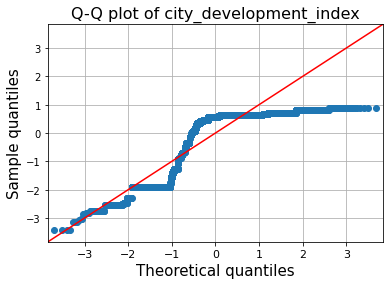

<Figure size 432x360 with 0 Axes>

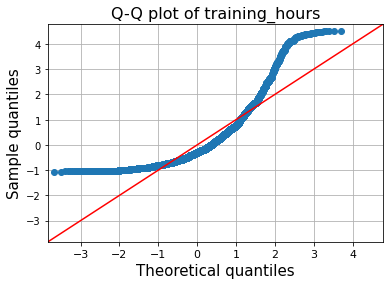

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
from statsmodels.api import qqplot

# read data and drop row with null
data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data = data.dropna()
# get the numeric columns
data_norm = data[['city_development_index','training_hours']]

# show Q-Q plot
for c in data_norm.columns[:]:
    plt.figure(figsize=(6,5))
    fig = qqplot(data_norm[c], line = '45', fit = 'True')
    plt.xticks(fontsize=11)
    plt.xlabel('Theoretical quantiles',fontsize=15)
    plt.ylabel('Sample quantiles',fontsize=15)
    plt.title("Q-Q plot of {}".format(c),fontsize=16)
    plt.grid(True)
    plt.show()



According to Q-Q plot, the numeric variables might have a normal distribution. However, based on the Q-Q plot, data might have more extreme value than a normal distribution expected.

## 4.What independent variables are useful to predict a target?

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data = data.dropna()
data = pd.get_dummies(data)
columns = data.columns.values.tolist()
columns.remove('enrollee_id')
columns.remove('target')
model = sm.OLS(data['target'], data[columns]).fit()
print(model.summary())
print('\n\n')

df_z = data.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
formula = 'target ~ city_development_index + training_hours'
result = smf.ols(formula, data=df_z).fit()
print(result.summary())
print('\n\n')

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data = data.dropna()
columns = data.columns.values.tolist()
columns.remove('enrollee_id')
columns.remove('target')
for c in columns:
    d = data
    d = d.drop(columns=[c])
    d = pd.get_dummies(d)
    col = d.columns.values.tolist()
    col.remove('enrollee_id')
    col.remove('target')
    model = sm.OLS(d['target'], d[col]).fit()
    print(c)
    print(model.rsquared)
    print()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     18.19
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:05:55   Log-Likelihood:                -2522.2
No. Observations:                8955   AIC:                             5378.
Df Residuals:                    8788   BIC:                             6564.
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

According to the OLS result, except enrollee id and training hour, all of the other independent variables have comparable lower p-value. Though some cities or other categorical data have high p-value, most of the other objects in the same categorical data have low p-value. So, except enrollee id, all the other independent variables are useful to predict a target.

Also, related to standardized regression coefficients of numeric variables, city development index has the greatest absolute value, which means it affect more than other numeric variables. So, city development index is more useful.

And, according to the R squared value change, adding city to the models will cause the greatest increase in R squared value. So, city is more useful

## 5.Which independent variables have missing data? How much?

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
print(data.isnull().sum()) # output the number of null in all columns

According to the result, gender has 4508 missing data, enrolled university has 386 missing data, education level has 460 missing data, major discipline 2813 missing data, experience has 65 missing data, company size has 5938 missing data, company type has 6140 missing data, last new job has 423 missing data.

## 6.Do the training and test sets have the same data?

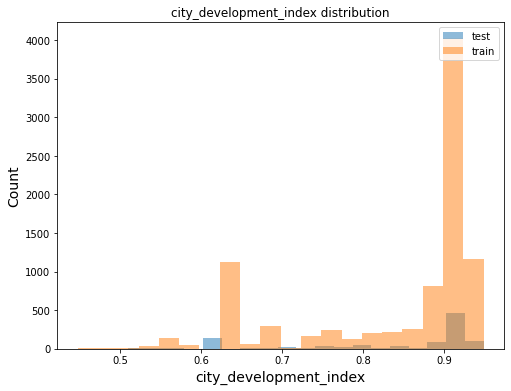

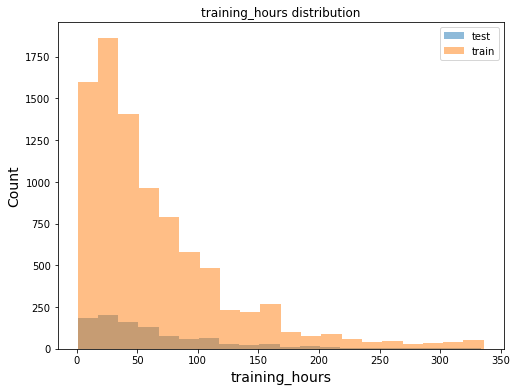

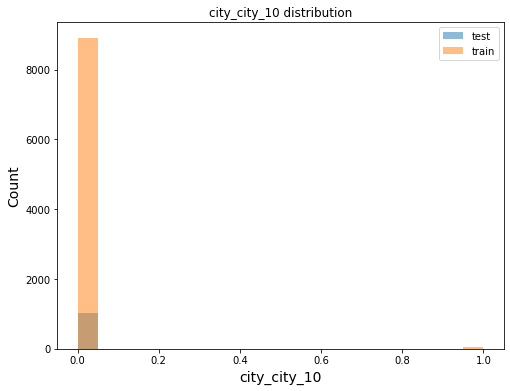

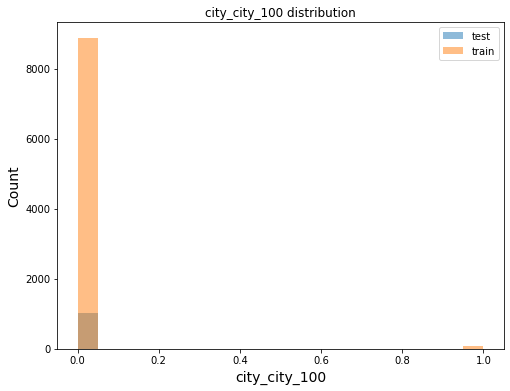

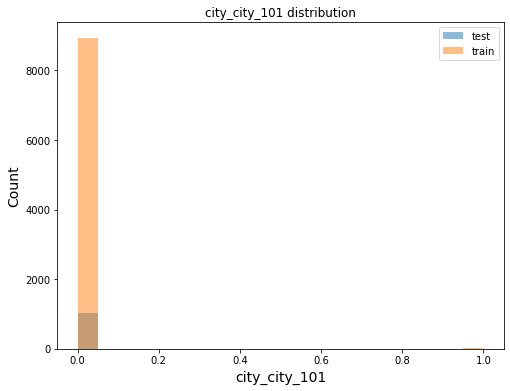

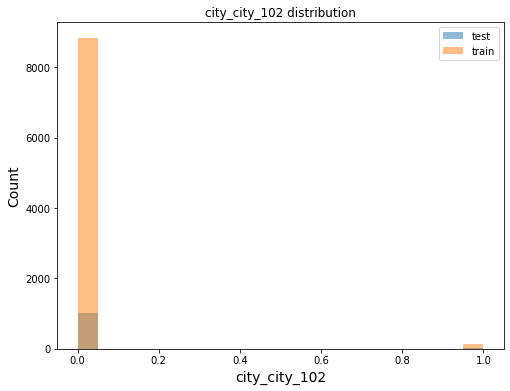

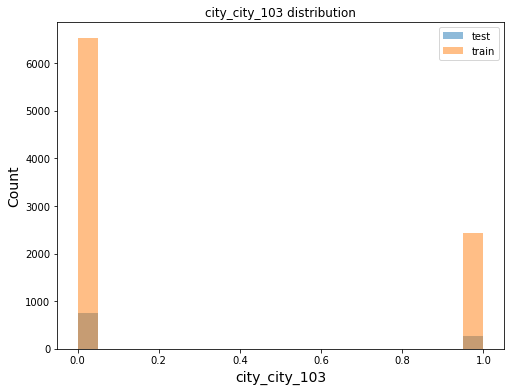

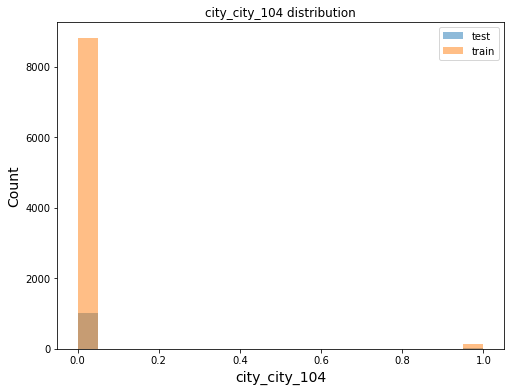

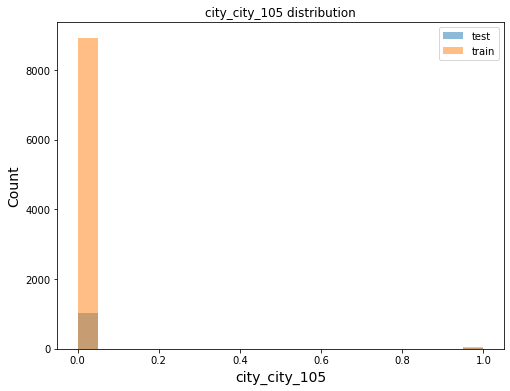

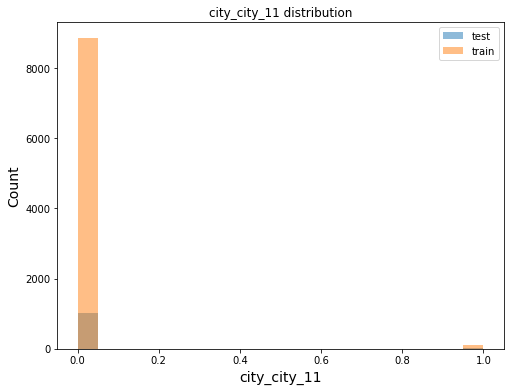

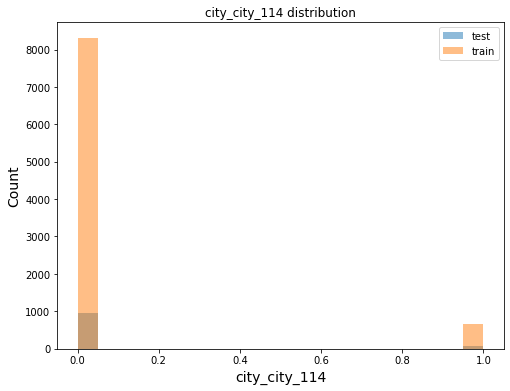

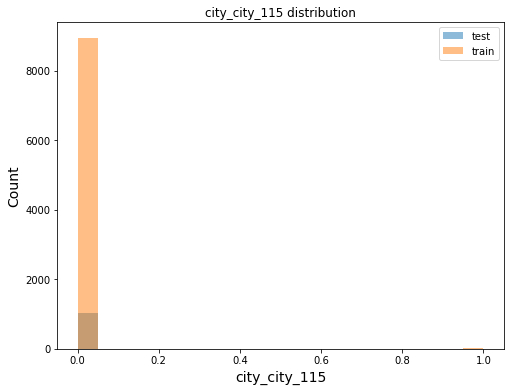

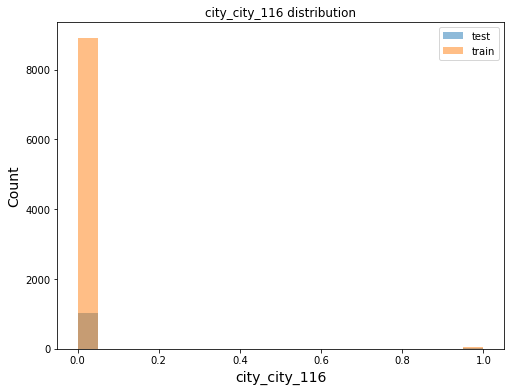

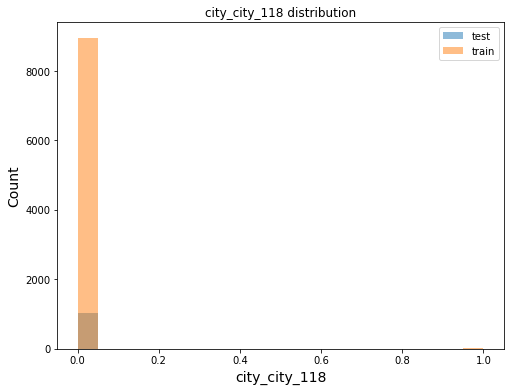

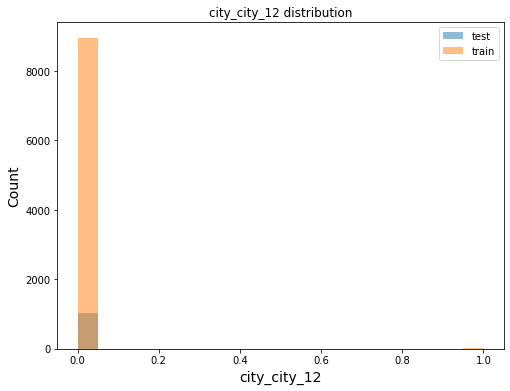

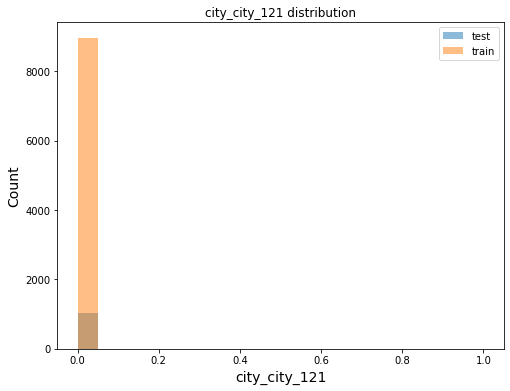

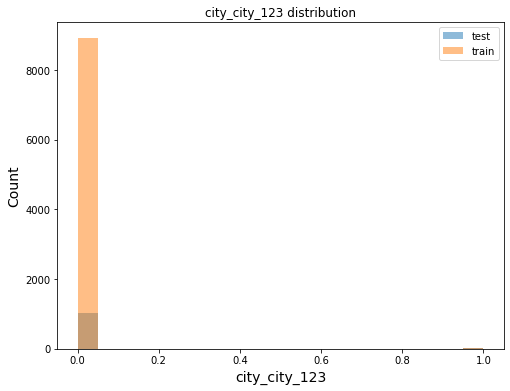

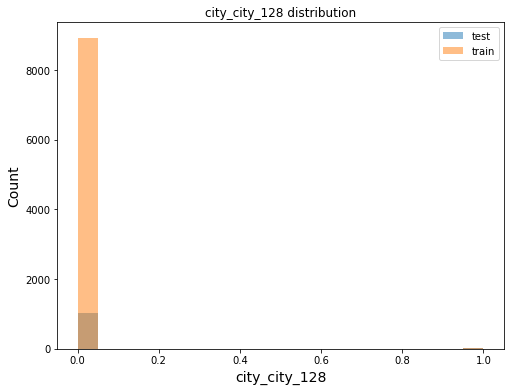

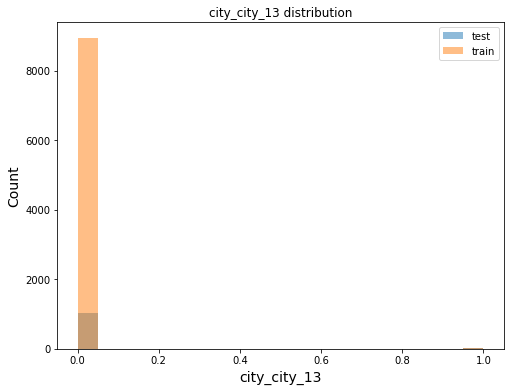

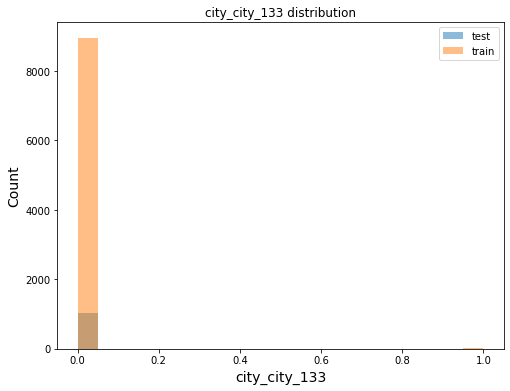

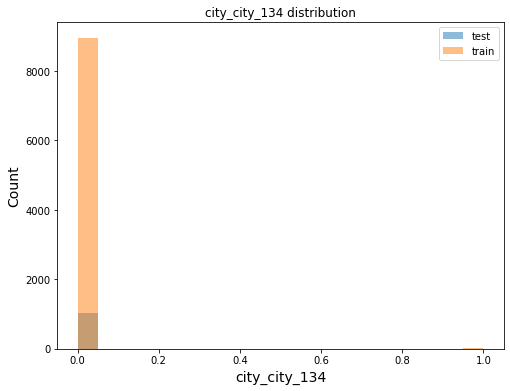

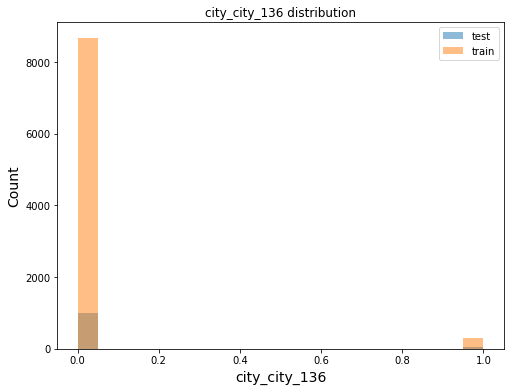

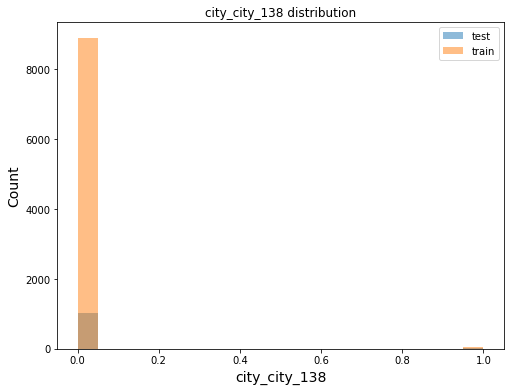

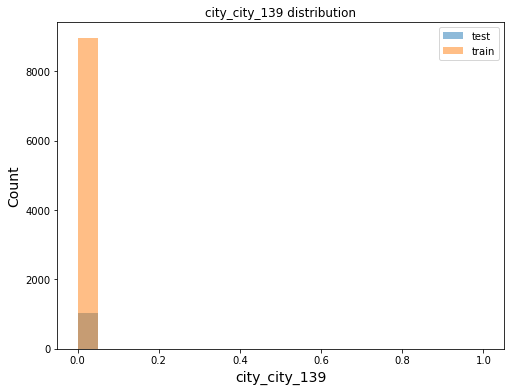

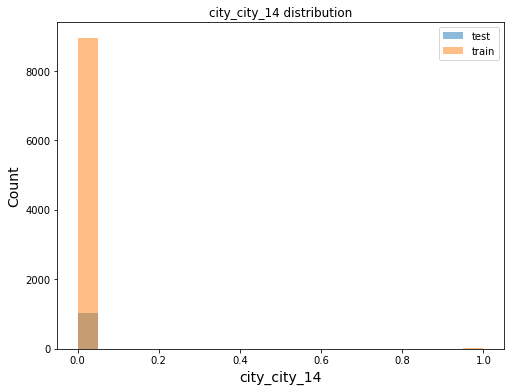

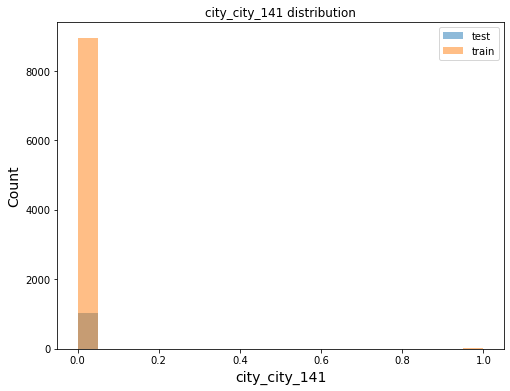

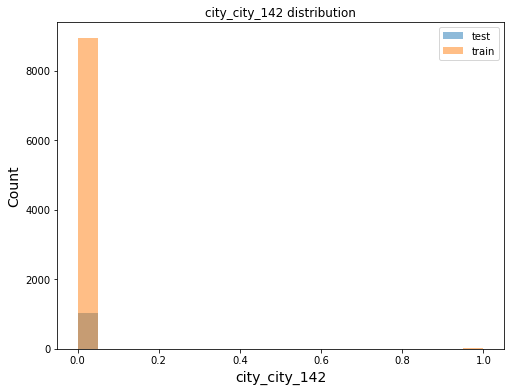

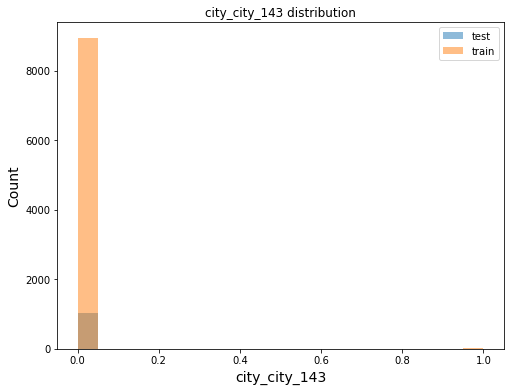

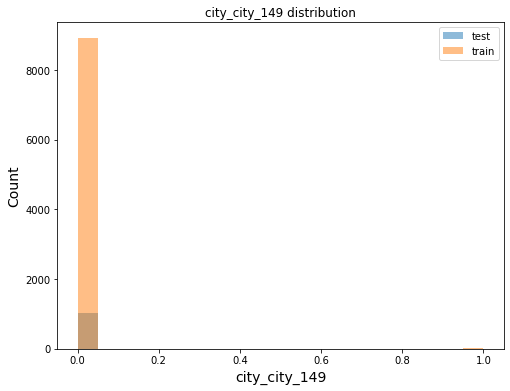

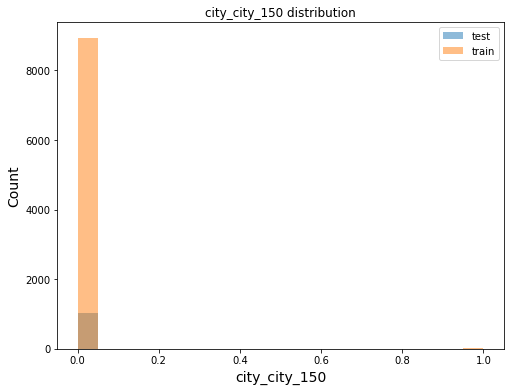

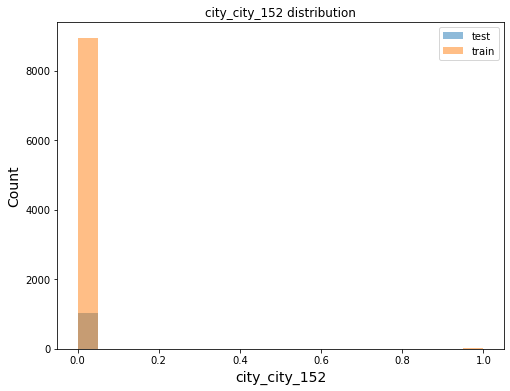

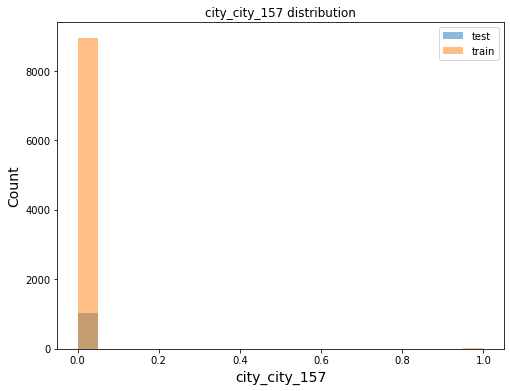

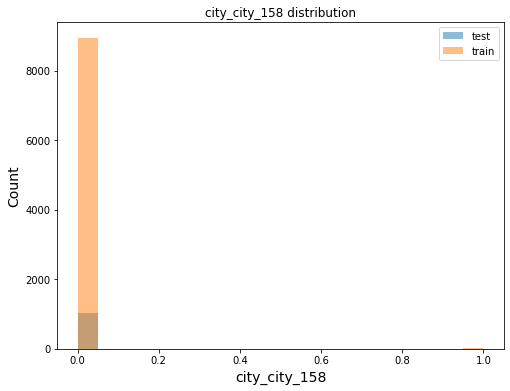

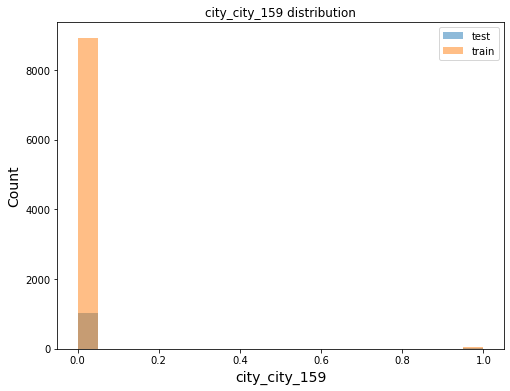

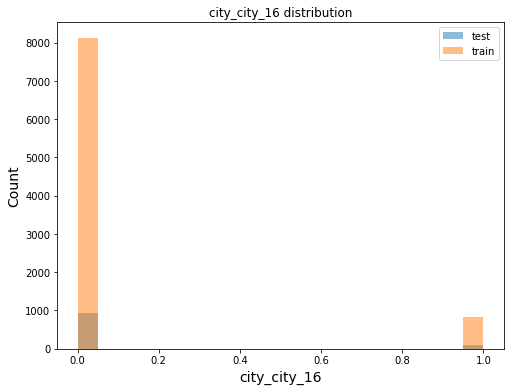

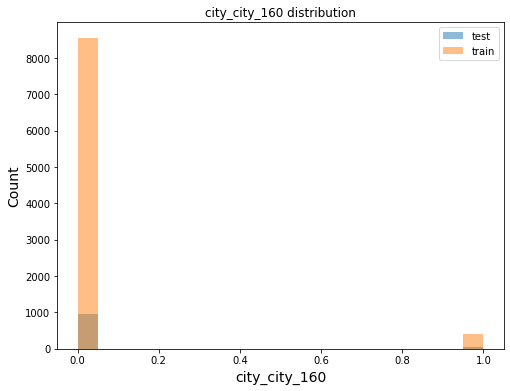

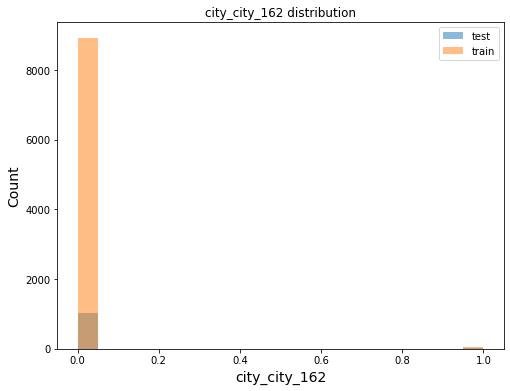

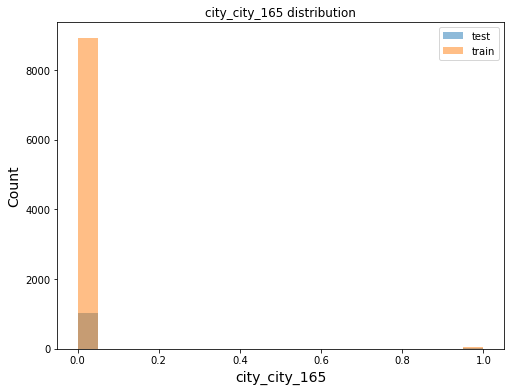

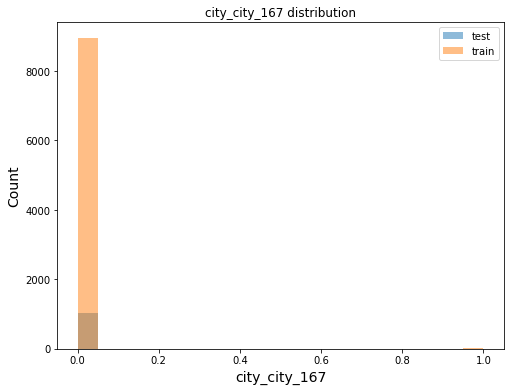

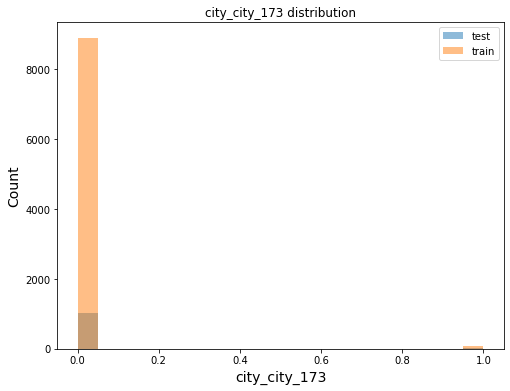

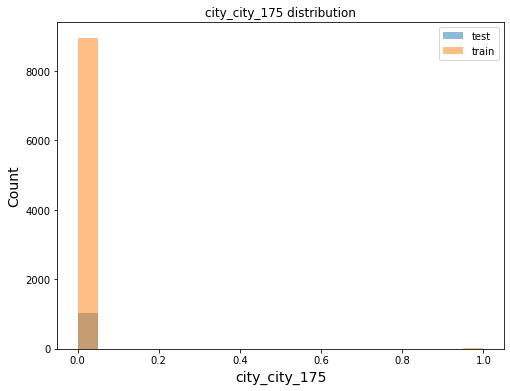

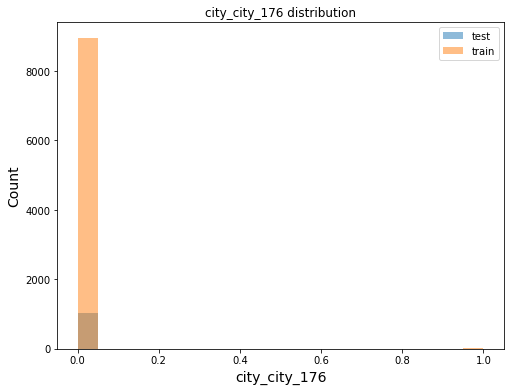

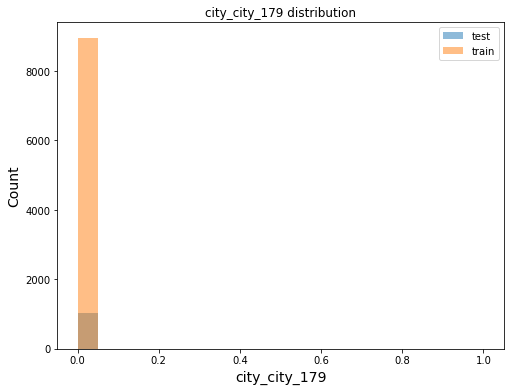

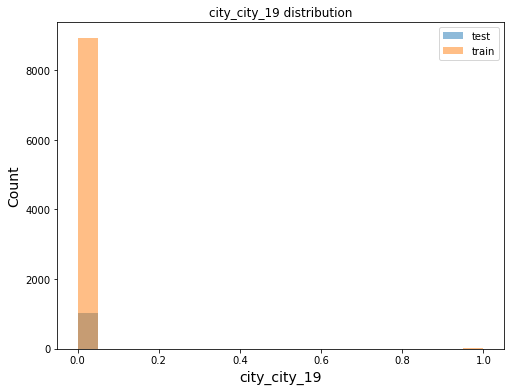

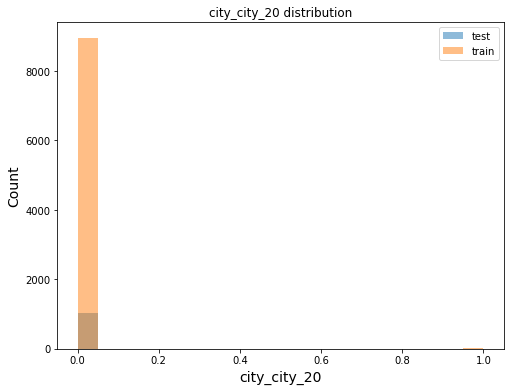

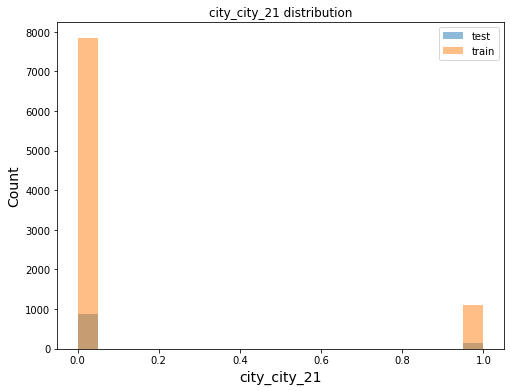

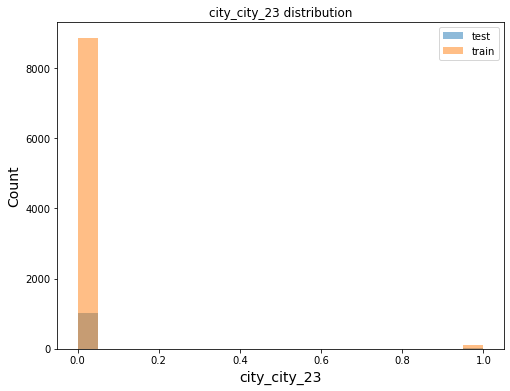

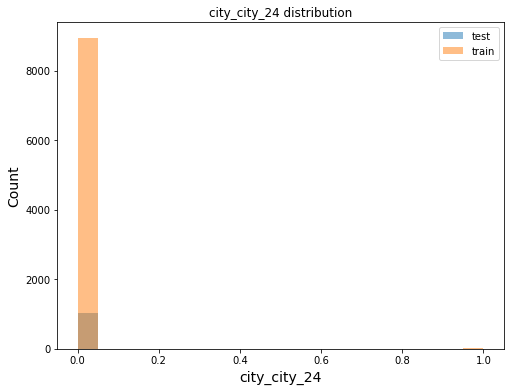

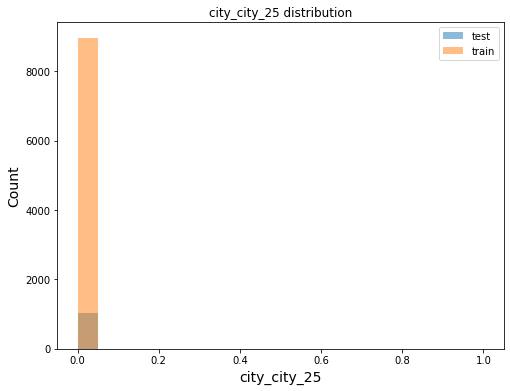

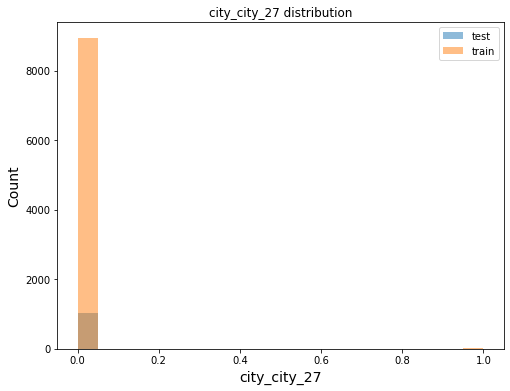

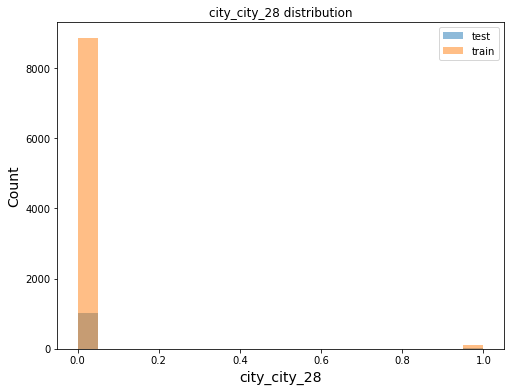

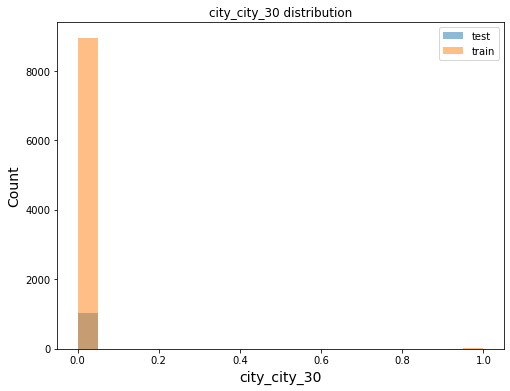

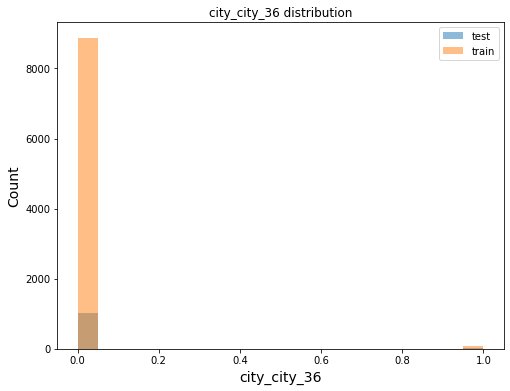

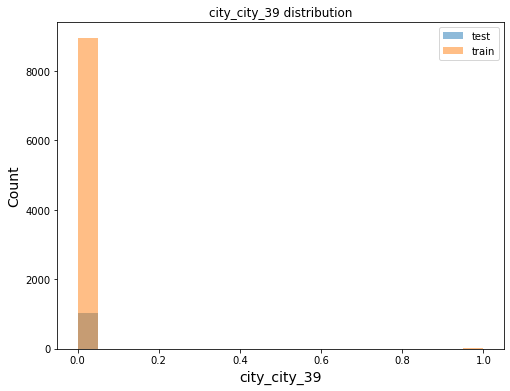

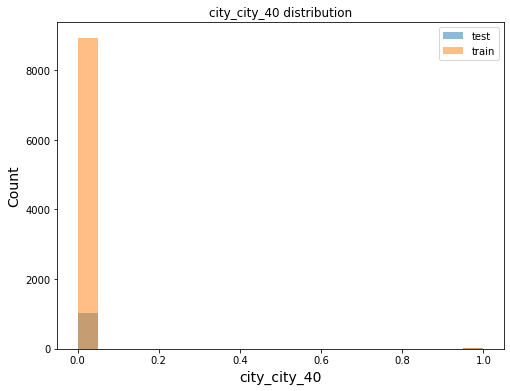

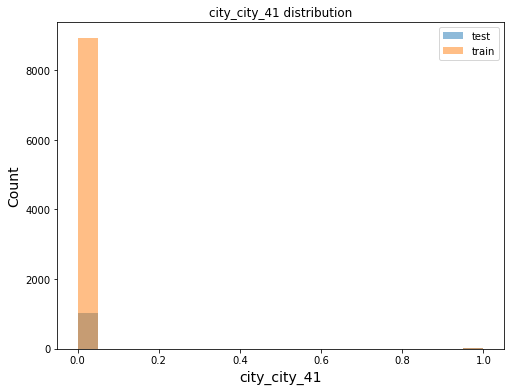

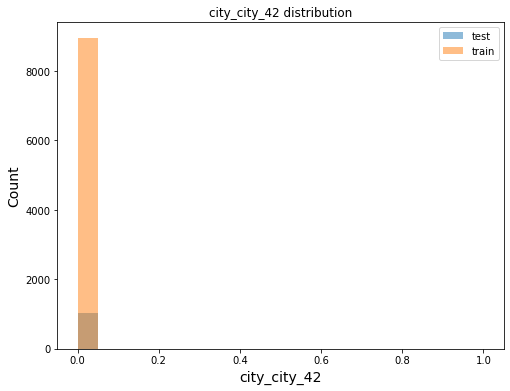

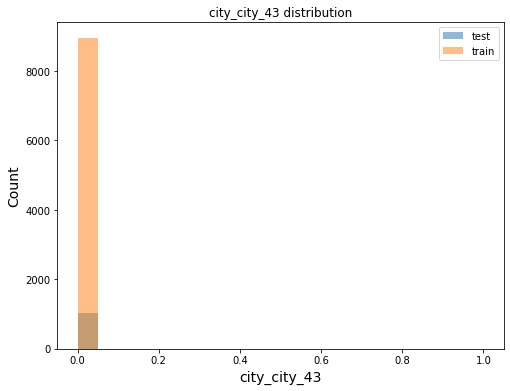

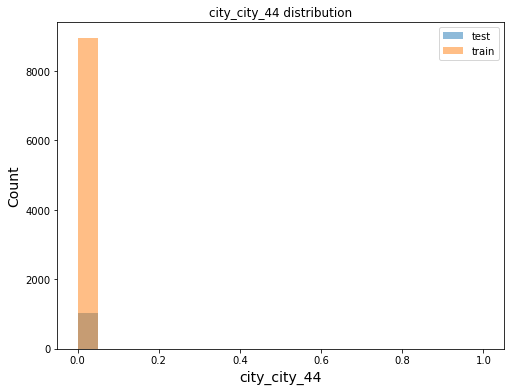

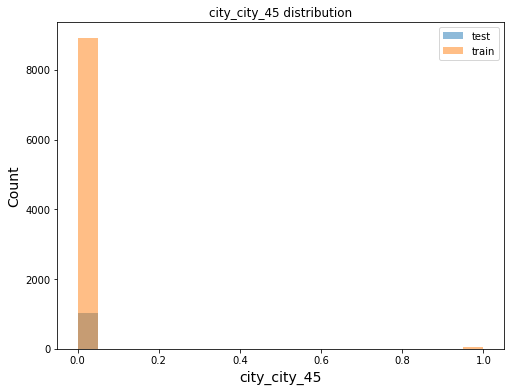

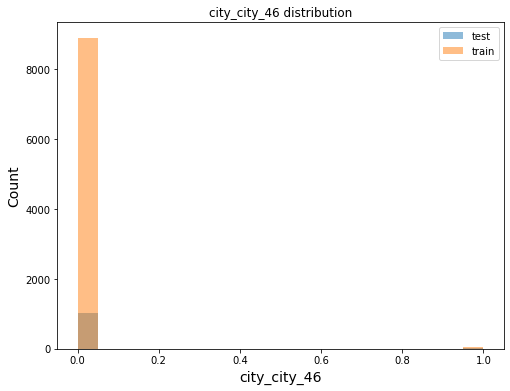

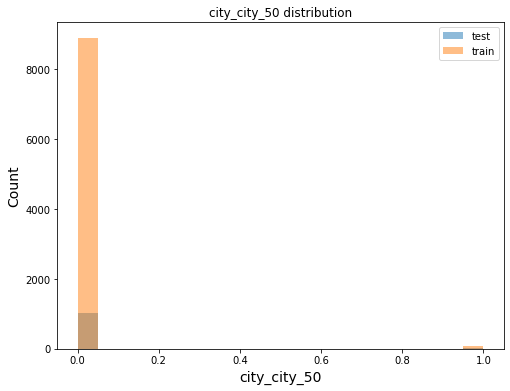

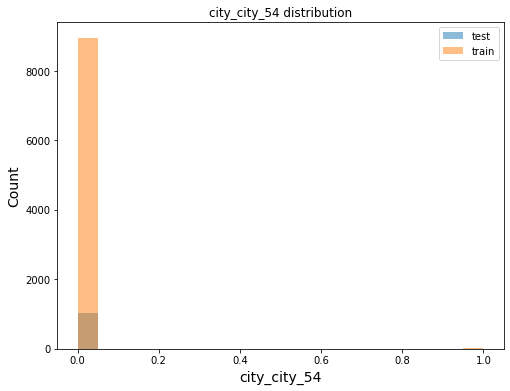

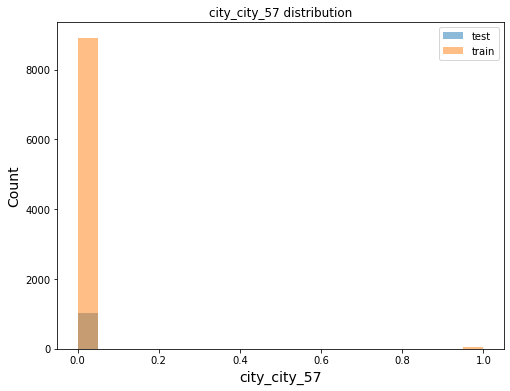

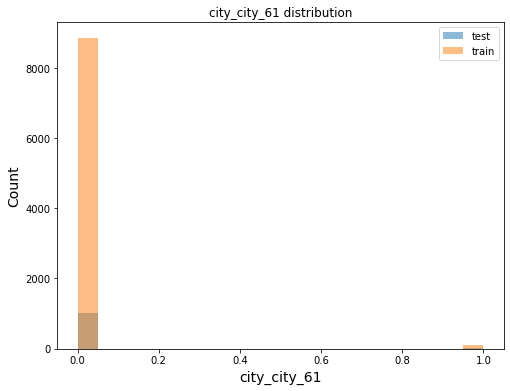

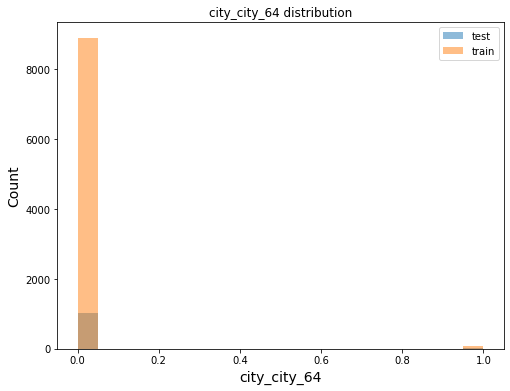

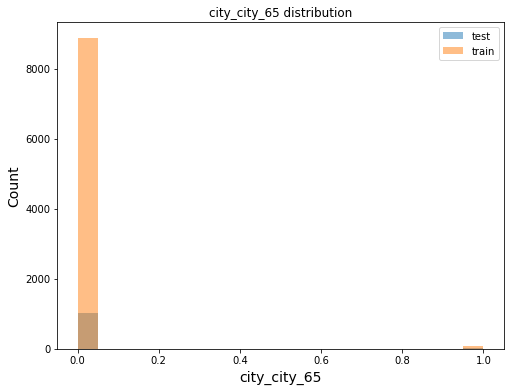

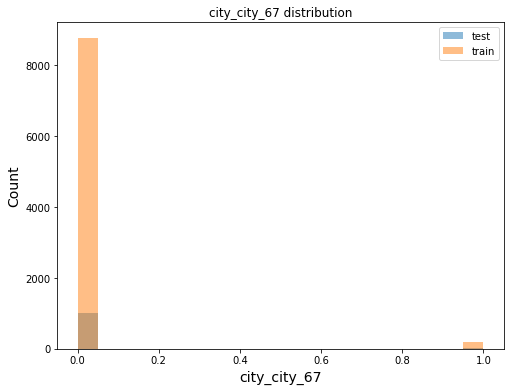

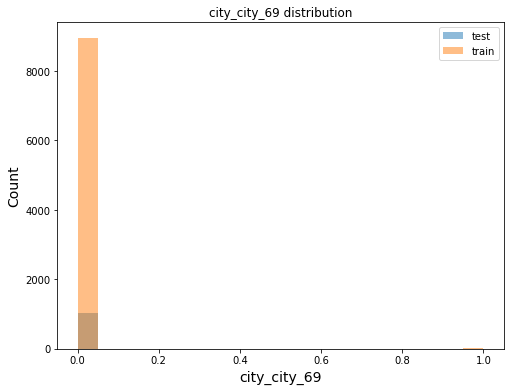

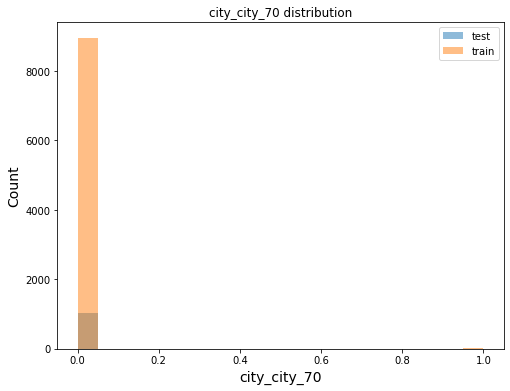

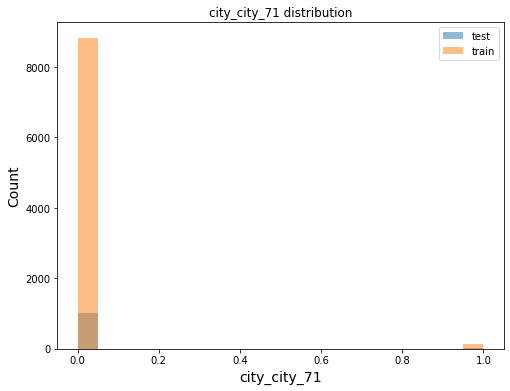

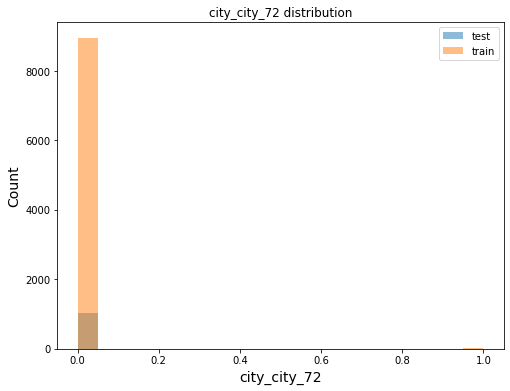

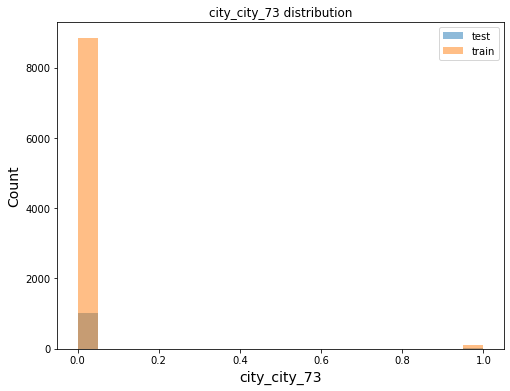

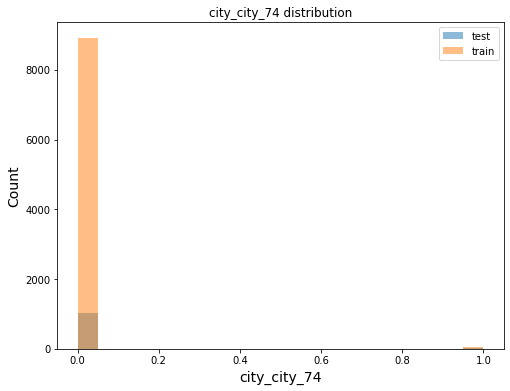

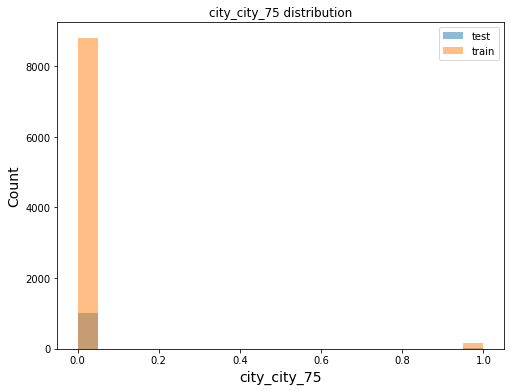

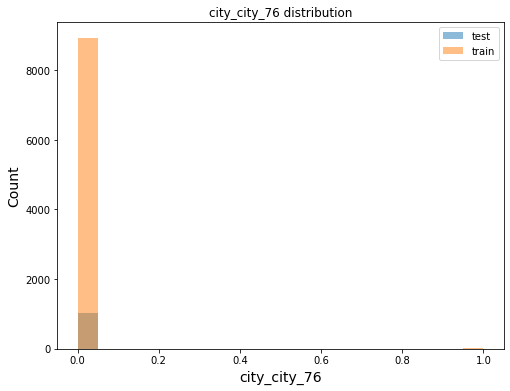

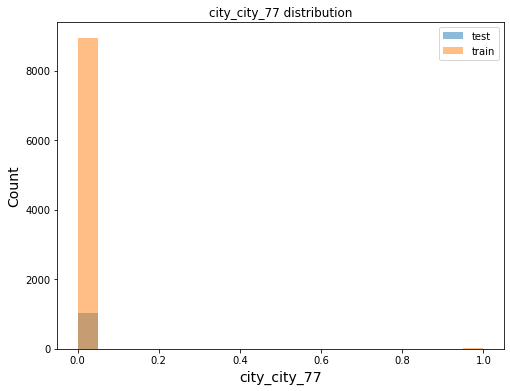

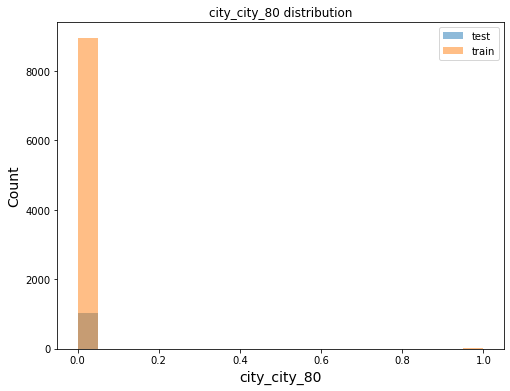

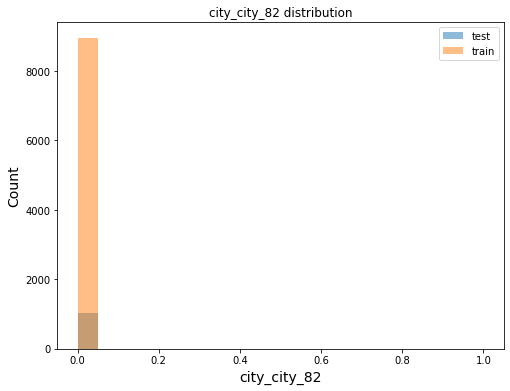

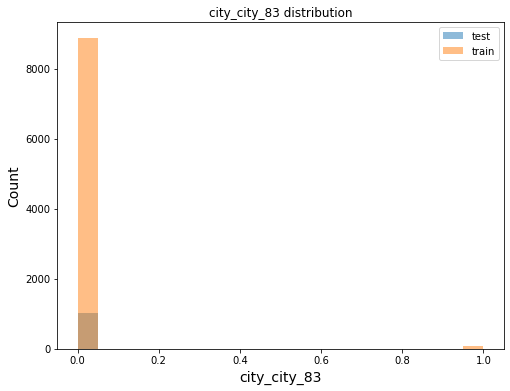

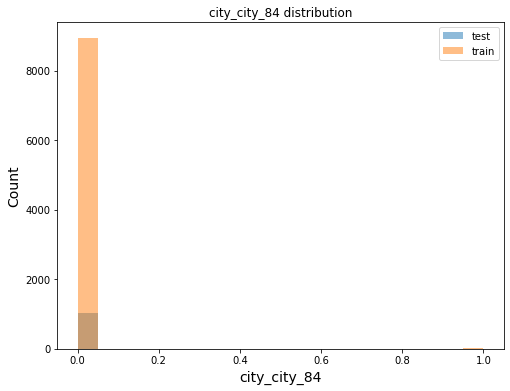

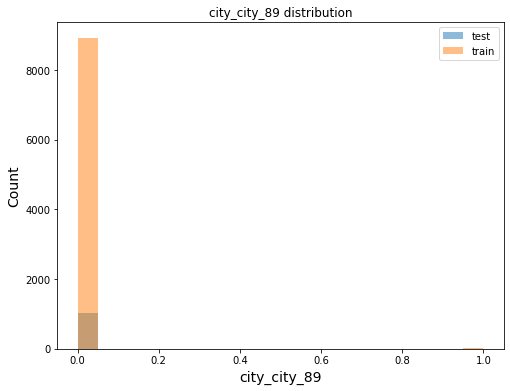

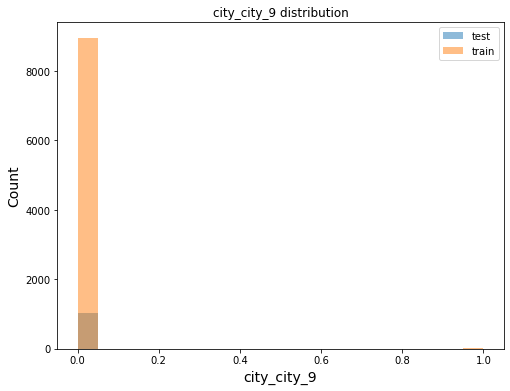

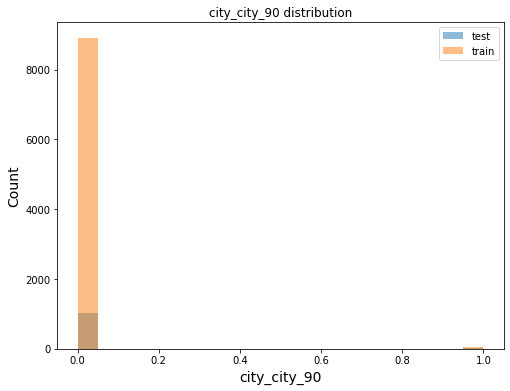

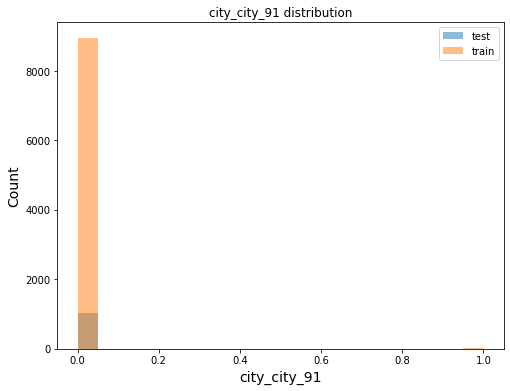

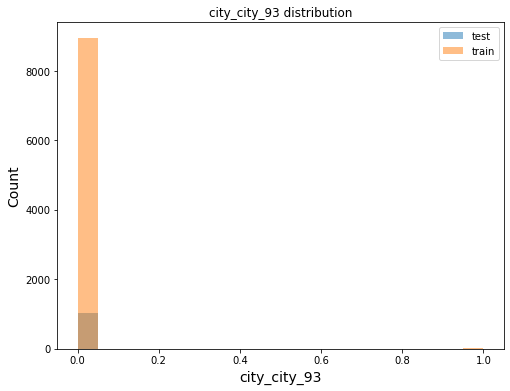

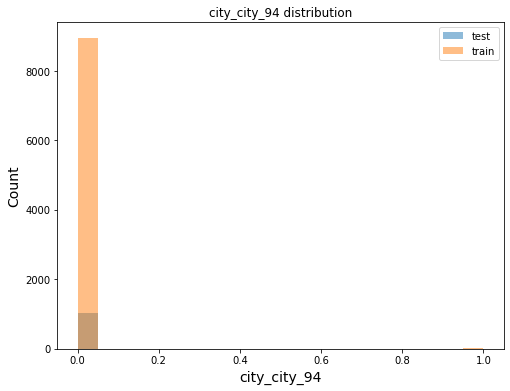

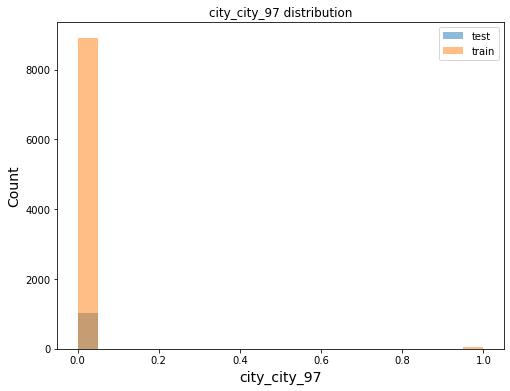

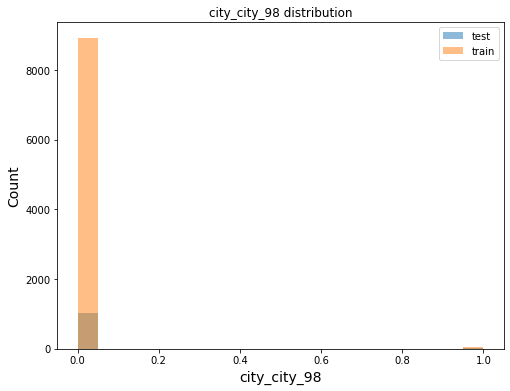

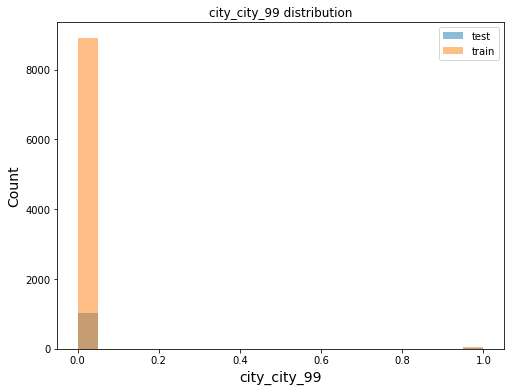

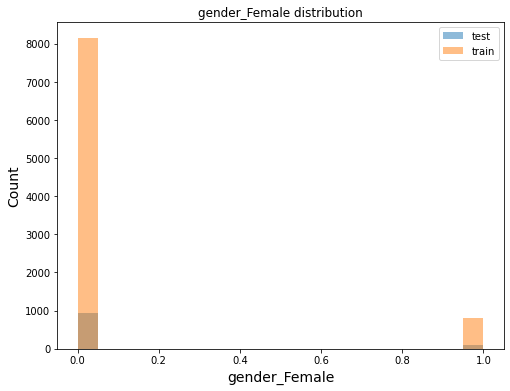

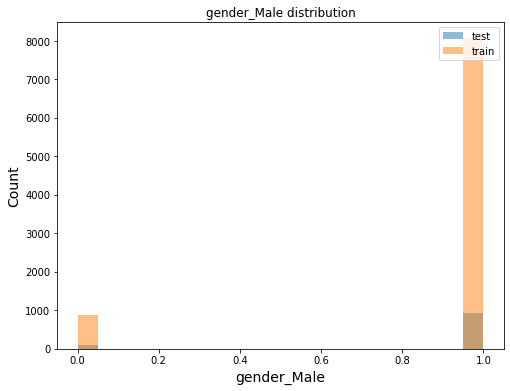

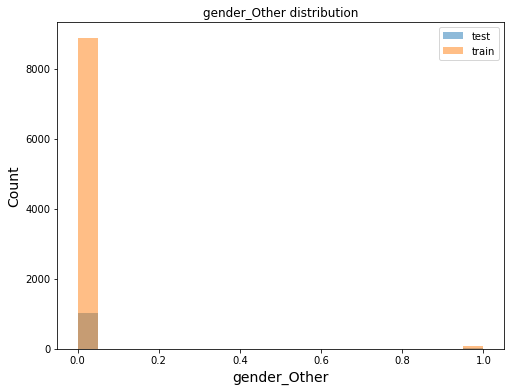

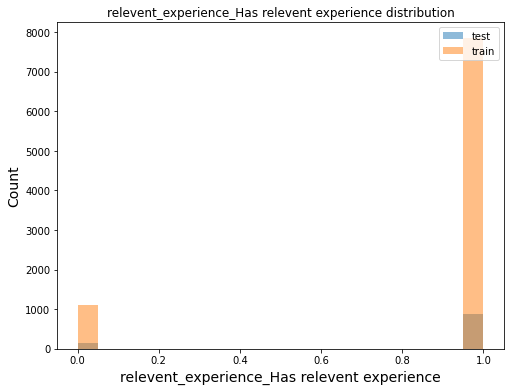

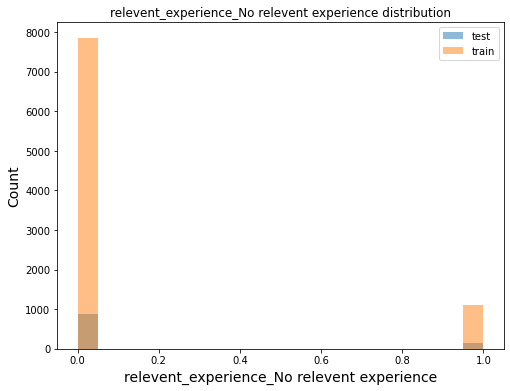

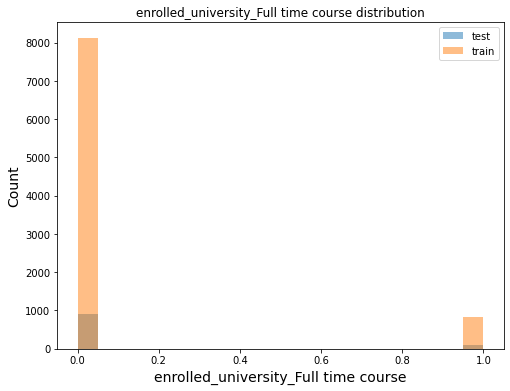

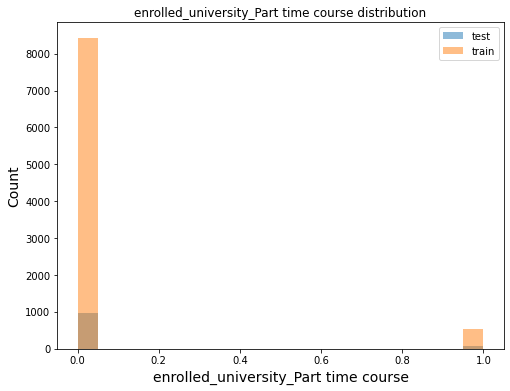

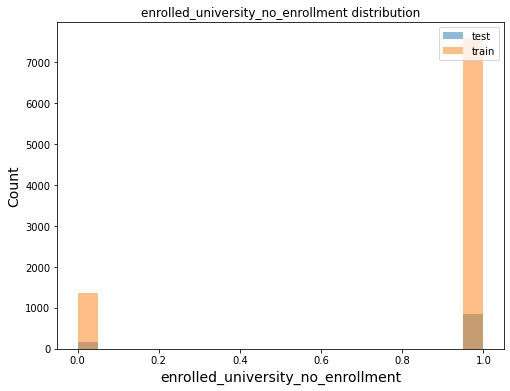

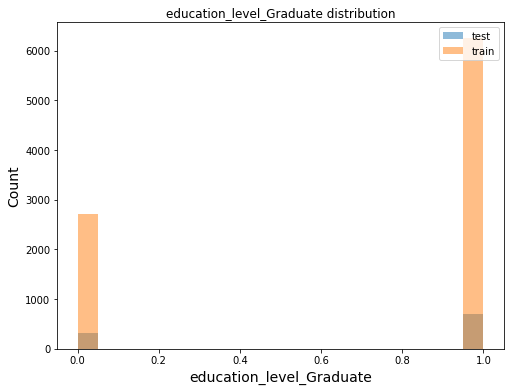

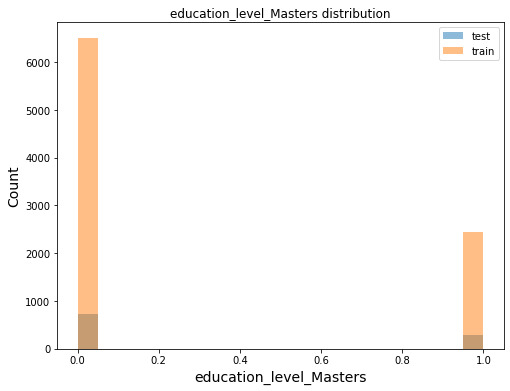

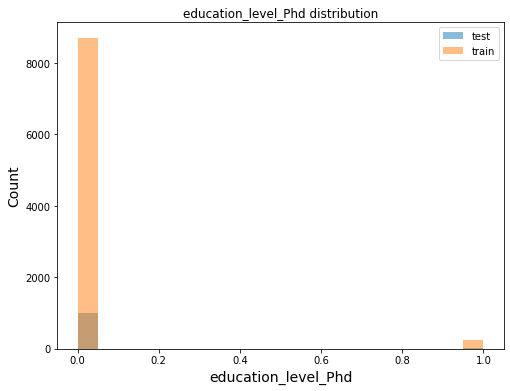

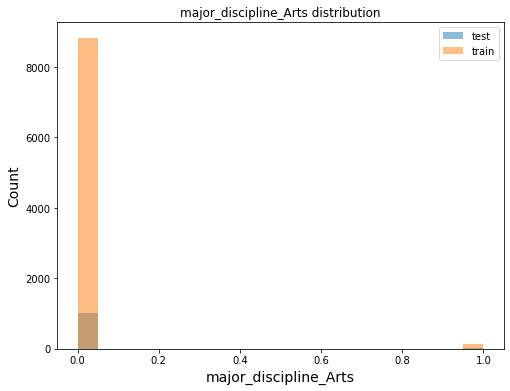

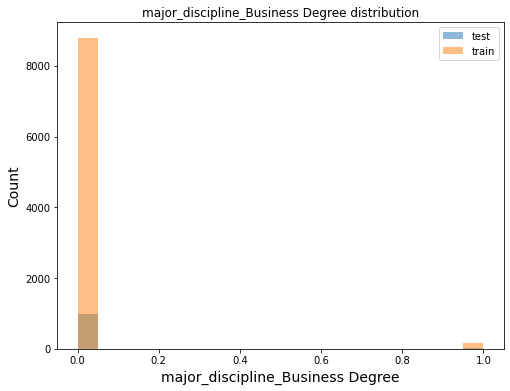

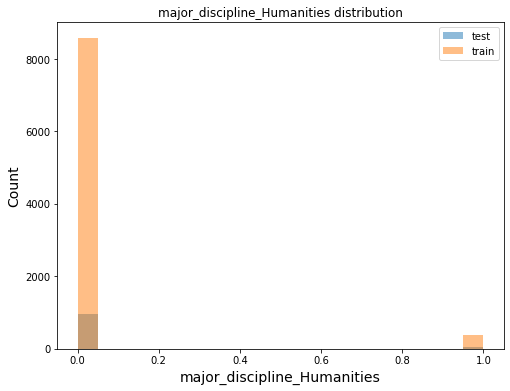

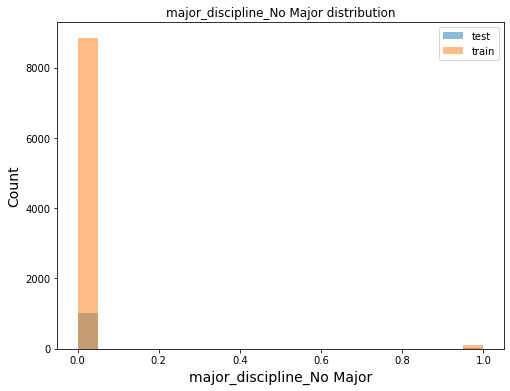

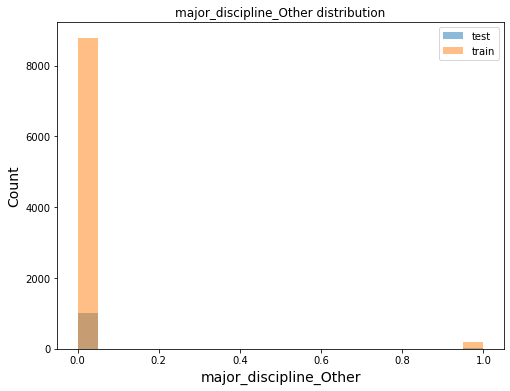

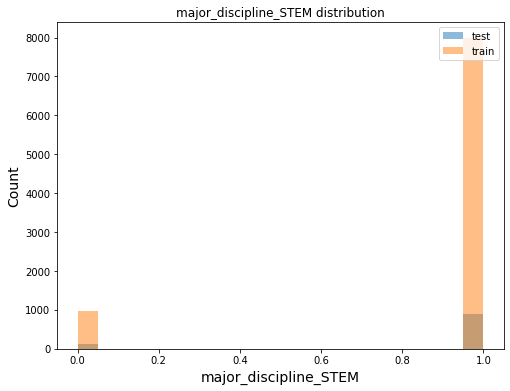

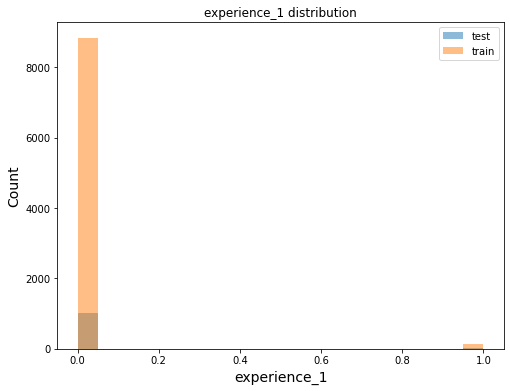

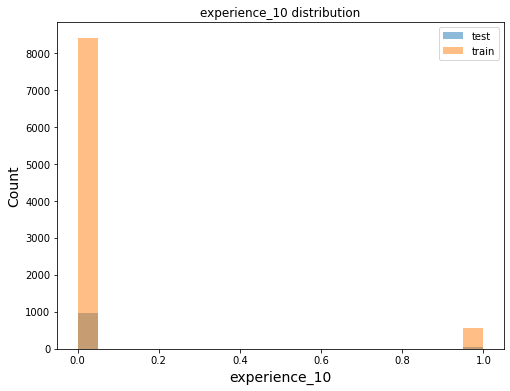

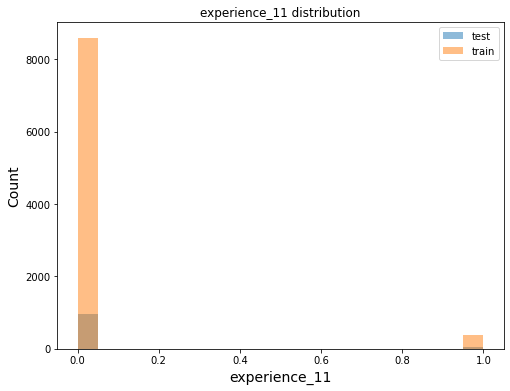

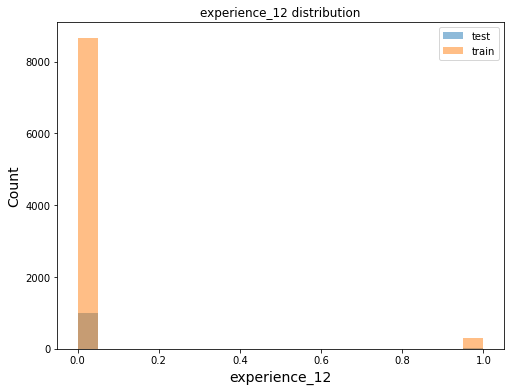

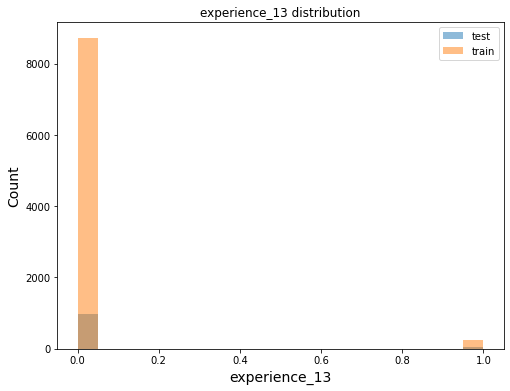

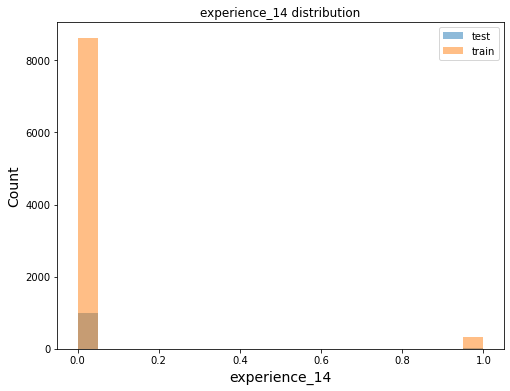

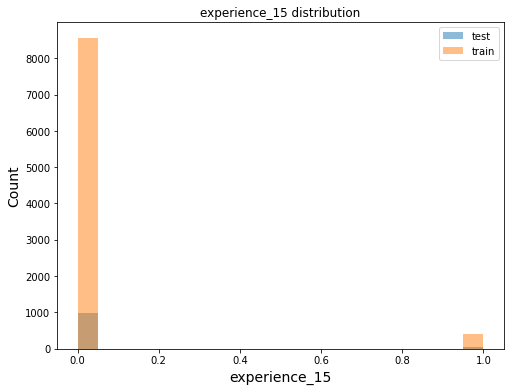

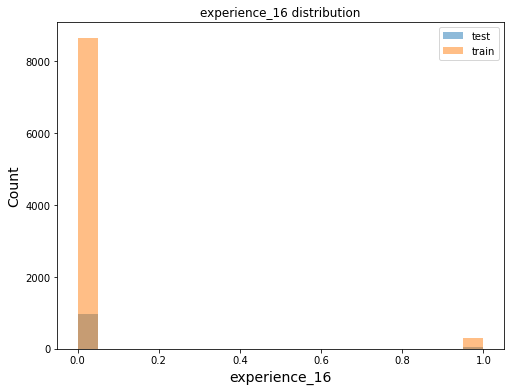

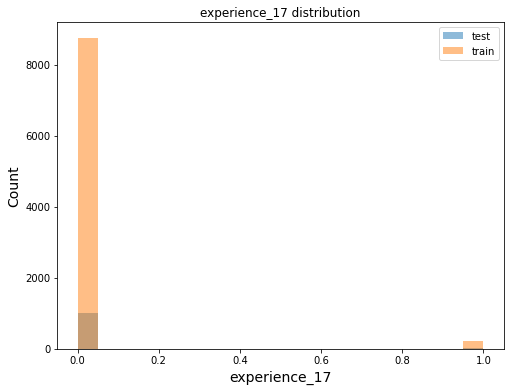

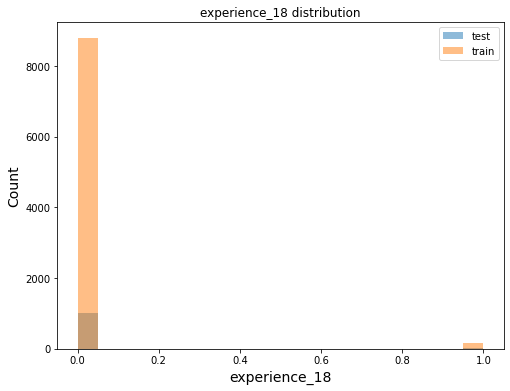

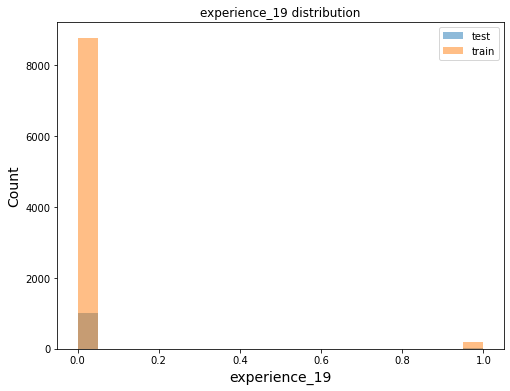

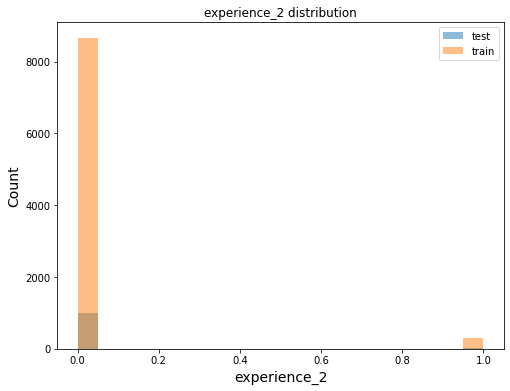

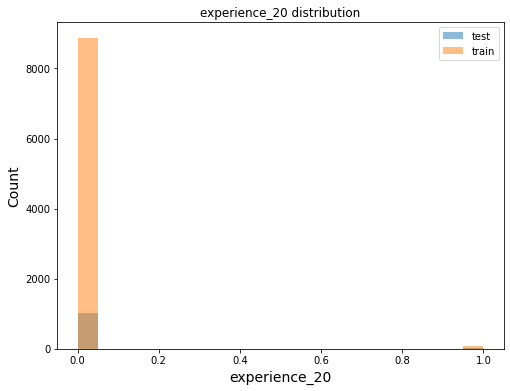

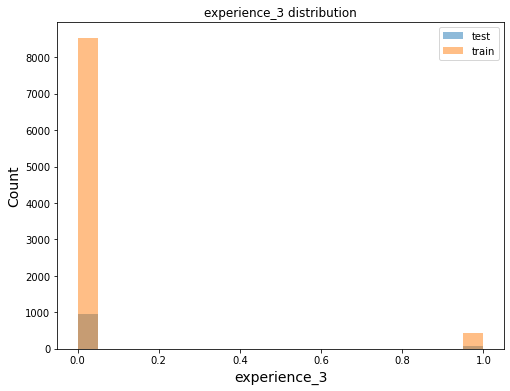

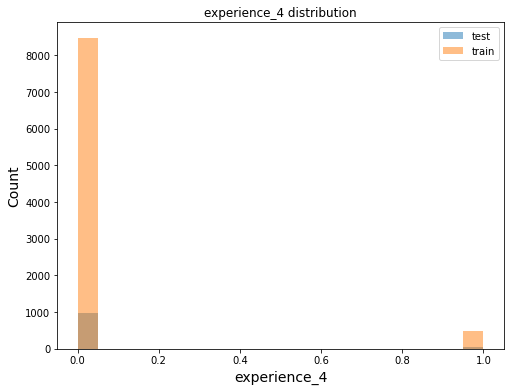

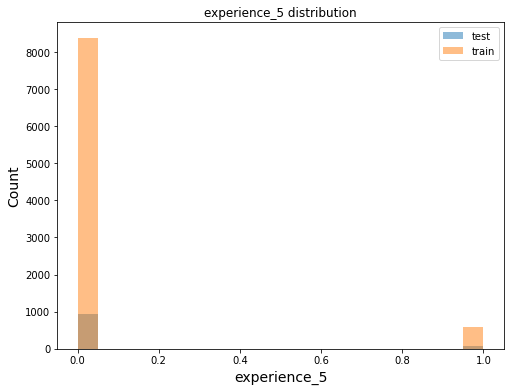

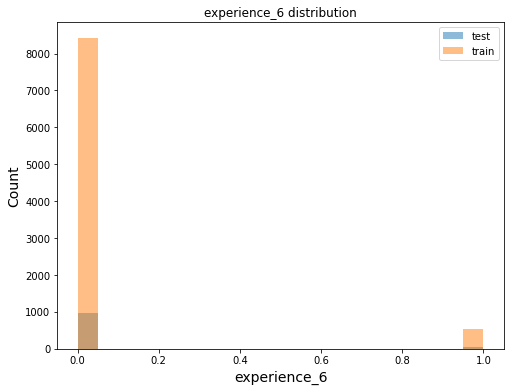

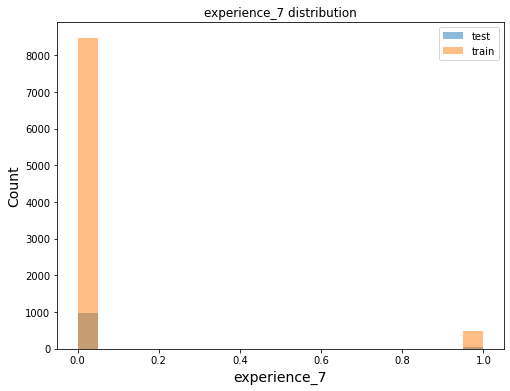

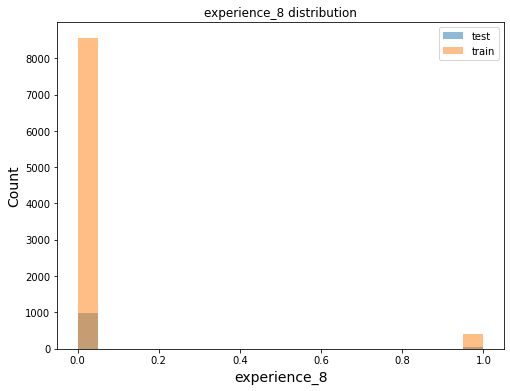

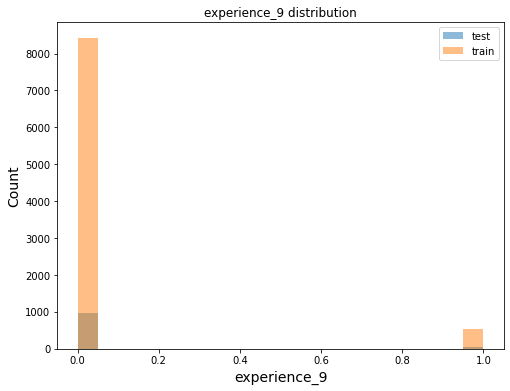

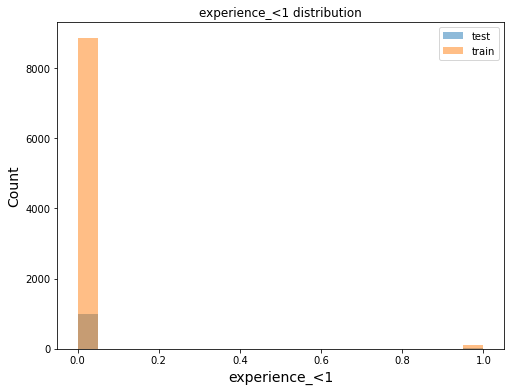

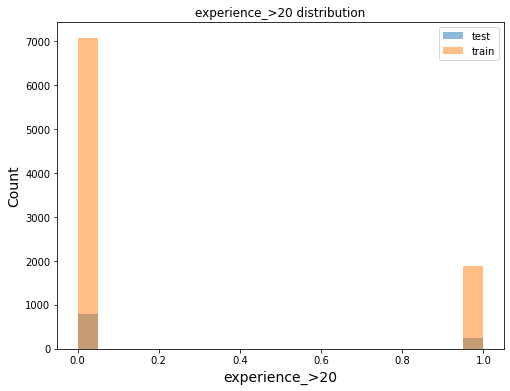

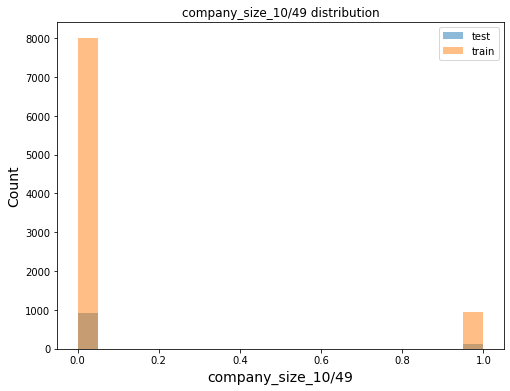

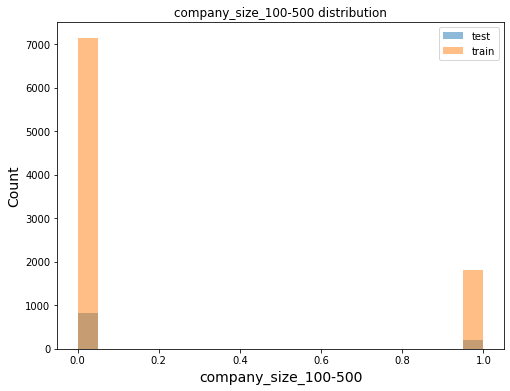

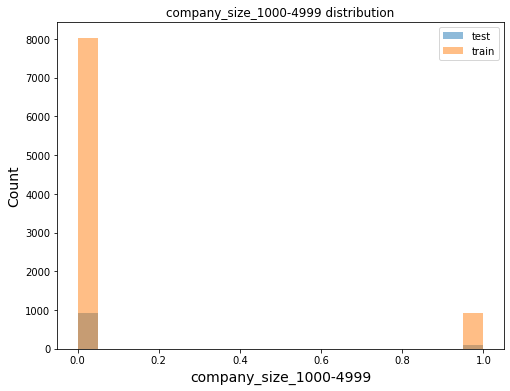

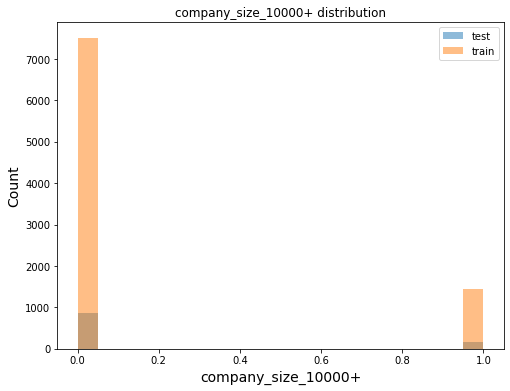

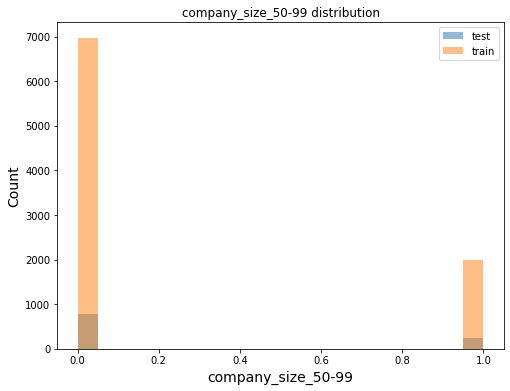

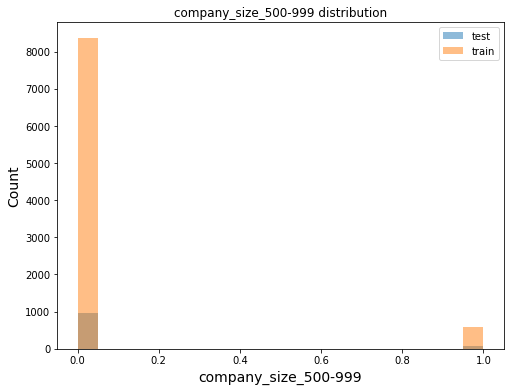

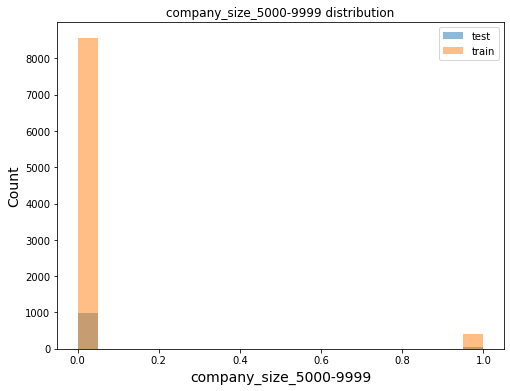

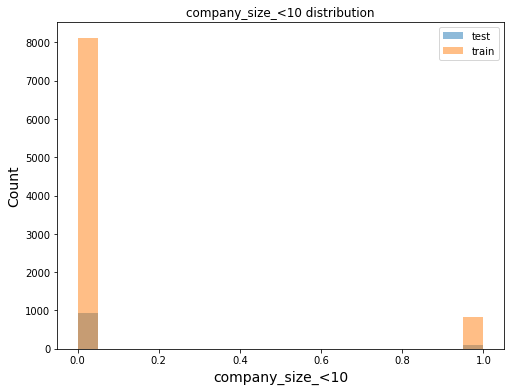

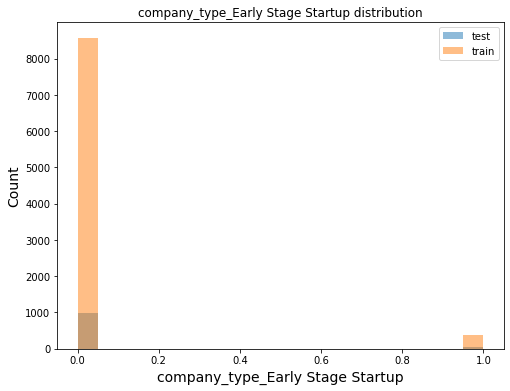

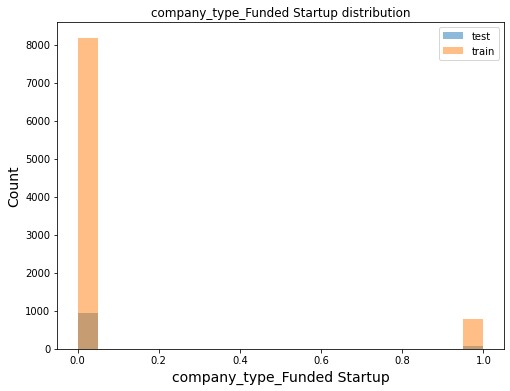

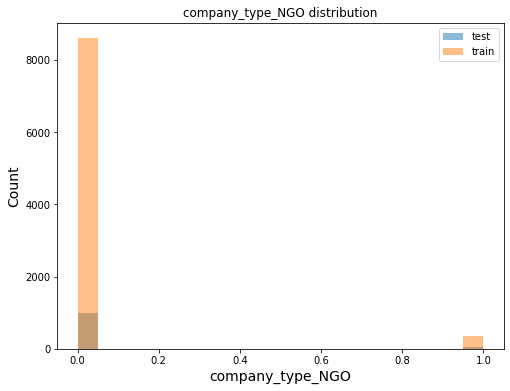

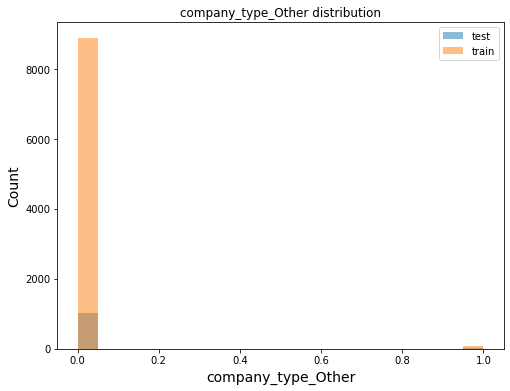

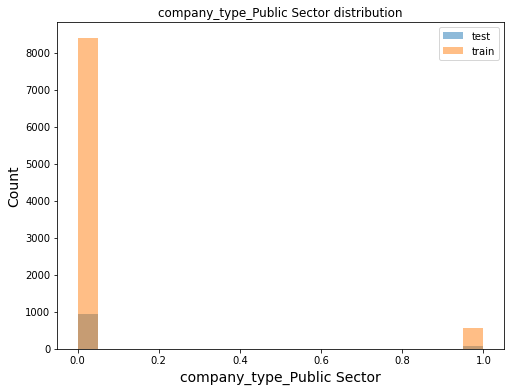

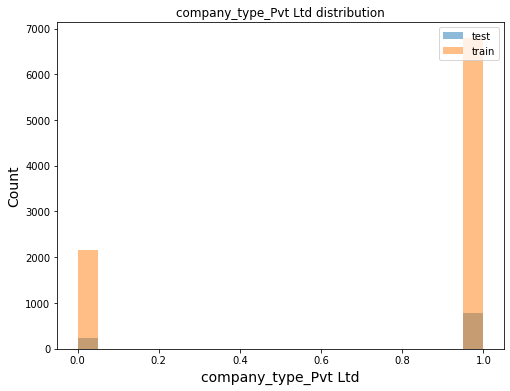

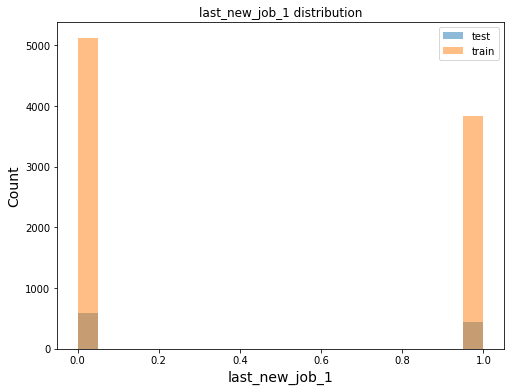

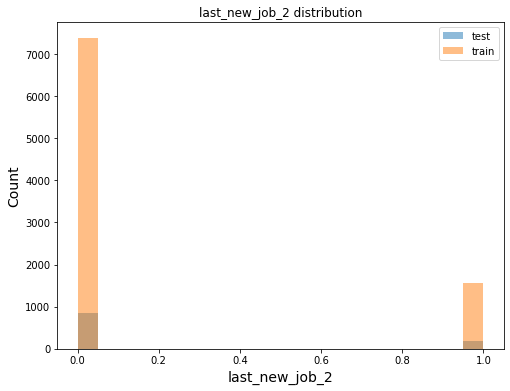

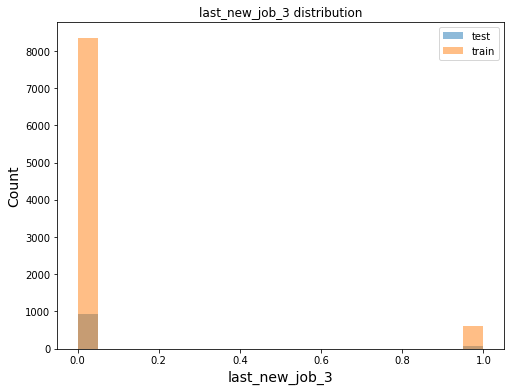

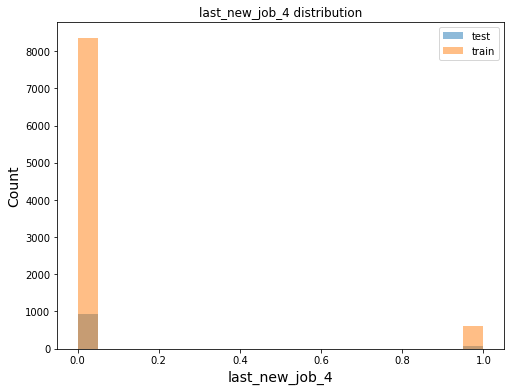

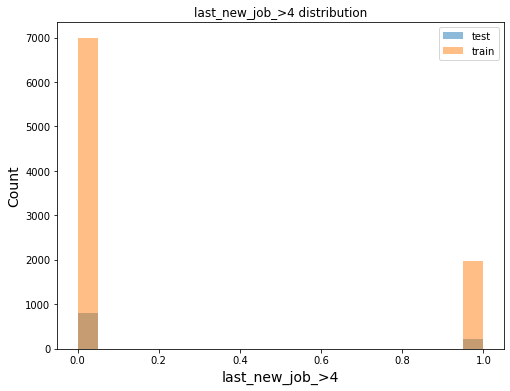

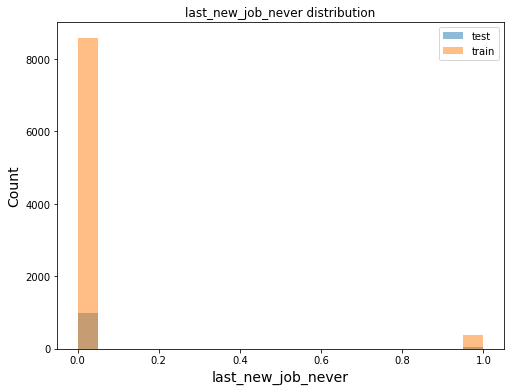

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pylab as plt

# load the test and train data, remove null and get the dummies
data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
test = test.dropna()
test = pd.get_dummies(test)
data = data.dropna()
data = pd.get_dummies(data)
columns = test.columns.values.tolist()
columns.remove('enrollee_id')

# show the diagram
for c in columns:
    plt.figure(figsize=(8,6))
    plt.hist(test[c], bins=20, alpha=0.5, label="test")
    plt.hist(data[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()


According to the output, some training data are not exactly covered by the test data

Except city development index, other variables have the same data in test and train data set

## 7.In the predictor variables independent of all the other predictor variables?

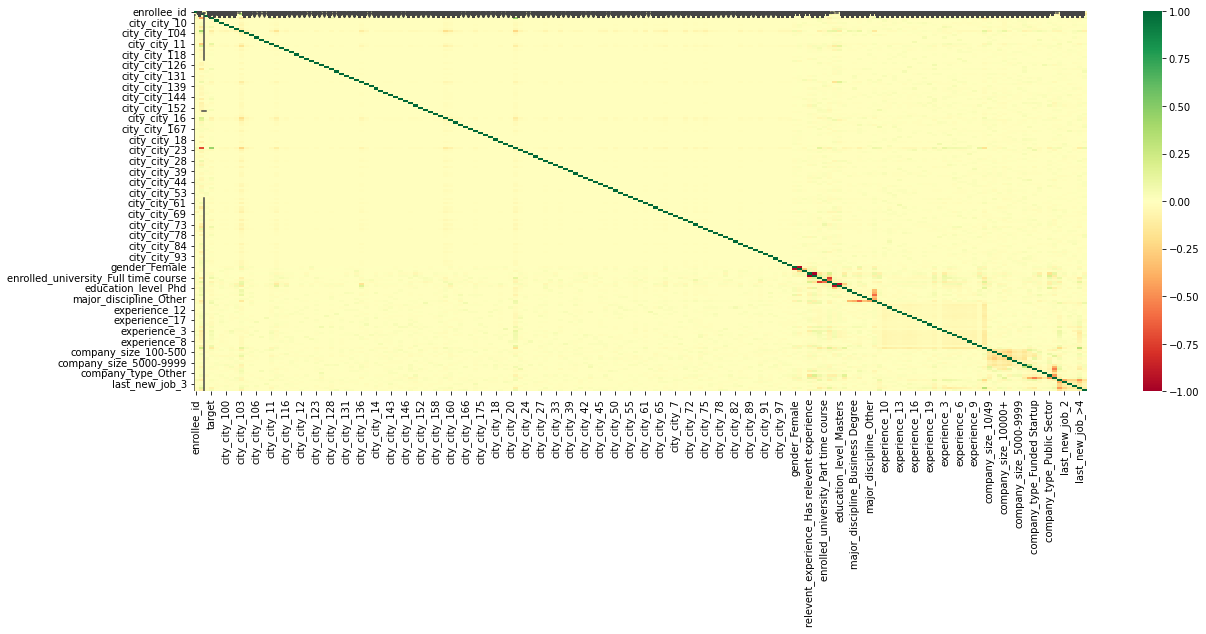

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data = data.dropna()
data = pd.get_dummies(data)

plt.figure(figsize=(20,7))
sns.boxplot(data=data)
sns.heatmap(data.corr(), cmap="RdYlGn")
plt.show()

According to the result, numeric data only has little correlation with each other, so the numeric predictor variables are independent.

## 8.Which predictor variables are the most important?

According to the OLS result above, city_48 has the greatest regression coefficient. So, city is the most important predictor variable

## 9.Do the ranges of the predictor variables make sense?

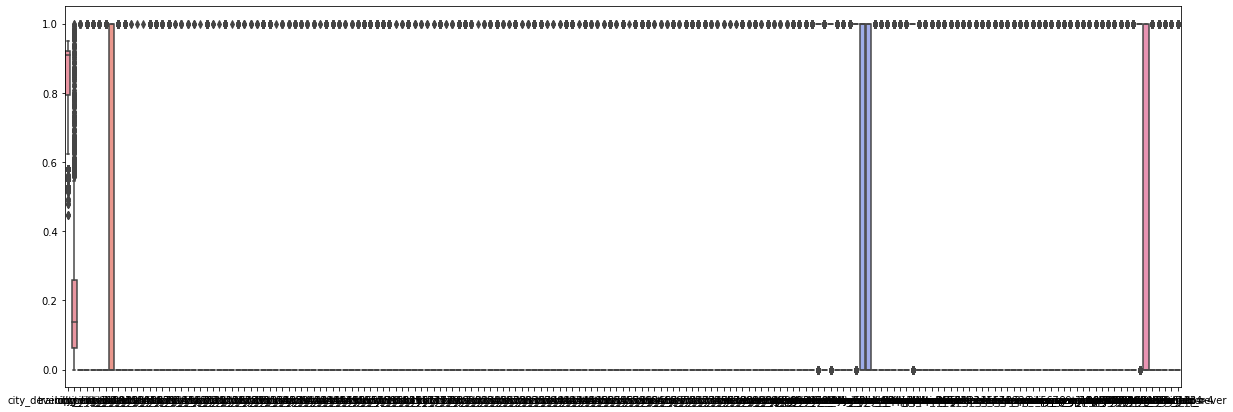

In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
import seaborn as sns

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data = data.dropna()
data = pd.get_dummies(data)
columns = data.columns.values.tolist()
columns.remove('enrollee_id')
columns.remove('target')

x = data[['training_hours']].values.astype(float)
mms = pp.MinMaxScaler()
x_scaled = mms.fit_transform(x)
data[['training_hours']] = pd.DataFrame(x_scaled)

plt.figure(figsize=(20,7))
sns.boxplot(data=data[columns])
plt.show()

According to the result, the data in the datasets do make sense. 
In city development index, most people come from developed city, and a few of them come from developing city. And in training hour, most people’s training hours are under 100, and a few of them have high training hours.


## 10.What are the distributions of the predictor variables?

According to the Q-Q plot, the predictor variables probably have a normal distribution

## 11.	Remove outliers and keep outliers (does if have an effect of the final predictive model)?

It will have effect on the final predictive model. According to the boxplot above, many categorical data are considering some data as outliers. Excluding these data will guarantee to cause loss of accuracy.

## 12.Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least imputation methods. How well did the methods recover the missing values?

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
import random
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.impute import KNNImputer as knni
from sklearn.preprocessing import LabelEncoder as le
from mlxtend.evaluate import bias_variance_decomp as bvd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, Lasso

def toIndx(data, dict, types, columns):
    i = 0
    while i < len(data[0]):
        if types[i] != 'object':
            i += 1
            continue
        j = 0
        while j < len(data):
            data[j][i] = dict[columns[i]][data[j][i]]
            j += 1
        i += 1


def remove(data, rate):
    lst = data.values.tolist()
    columns = data.columns.values.tolist()
    i = 0
    while i < len(lst):
        j = 1
        while j < len(lst[0]) - 1:
            if random.randint(0, 99) < rate:
                lst[i][j] = np.nan
            j += 1
        i += 1
    data = pd.DataFrame(lst)
    data.columns = columns
    return data


def print_result(data, result):
    columns = result.columns.values.tolist()
    columns.remove('target')
    columns.remove('enrollee_id')
    model = sm.OLS(result['target'], result[['city_development_index','training_hours']]).fit()
    X_train, X_test, y_train, y_test = tts(result[['city_development_index','training_hours']], data['target'], test_size=0.33, random_state=1)
    model_lr = LinearRegression()
    mse, bias, var = bvd(model_lr, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse',num_rounds=200,random_seed=123)
    print('\nvariance: ',var.round(7))
    print('bias: ',bias.round(3))
    # print(result[['city_development_index','training_hours']].var())
    print(model.summary())
    for c in columns:
        if c == 'city_development_index' or c == 'training_hours':
            continue
        y_true = data[c].values.tolist()

        labels=[]
        for r in y_true:
            if r not in labels:
                labels.append(r)
        y_pred = result[c].values.tolist()
        matrix = cm(y_true, y_pred, labels=labels)
        m_list = matrix.tolist()
        acc = asc(y_true, y_pred) * 100
        format = "{:.2f}".format(acc)
        print(c + '\nAccuracy: ' + format + '%')
        if c == 'city':
            print(matrix)
            continue
        for line in m_list:
            print(line)

def change_type(result):
    result['target'] = result['target'].astype(int)
    result['enrollee_id'] = result['enrollee_id'].astype(int)
    result['city_development_index'] = result['city_development_index'].astype(float)
    result['training_hours'] = result['training_hours'].astype(float)
    return result

def most_frequent(data, rate):
    tmp = remove(data, rate)
    columns = data.columns.values.tolist()
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    result = imp.fit_transform(tmp).tolist()
    result = pd.DataFrame(result)
    result.columns = columns
    result = change_type(result)
    print_result(data, result)
    
def nearest(data, dict, reverse, rate):
    columns = data.columns.values.tolist()
    lst = data.values.tolist()
    types = data.dtypes.values.tolist()
    toIndx(lst, dict, types, columns)
    tmp = pd.DataFrame(lst)
    tmp.columns = columns
    tmp = remove(tmp, rate)
    imp = knni(n_neighbors=1)
    result = imp.fit_transform(tmp)
    result = pd.DataFrame(result).values.tolist()
    toIndx(result, reverse, types, columns)
    result = pd.DataFrame(result)
    result.columns = columns
    result = change_type(result)
    print_result(data, result)

def median(data, dict, reverse, rate):
    columns = data.columns.values.tolist()
    lst = data.values.tolist()
    types = data.dtypes.tolist()
    toIndx(lst, dict, types, columns)
    tmp = pd.DataFrame(lst)
    tmp.columns = columns
    tmp = remove(tmp, rate)
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    result = imp.fit_transform(tmp).tolist()
    toIndx(result, reverse, types, columns)
    result = pd.DataFrame(result)
    result.columns = columns
    result = change_type(result)
    print_result(data, result)
    

data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data = data.dropna()

dict = {}
reverse = {}
columns = data.columns.values.tolist()
types = data.dtypes.values.tolist()
list = data.values.tolist()
i = 0
while i < len(list[0]):
    current = {}
    r = {}
    if types[i] != 'object':
        dict[columns[i]] = current
        reverse[columns[i]] = r
        i += 1
        continue
    indx = 0
    j = 0
    while j < len(list):
        if list[j][i] not in current:
            current[list[j][i]] = indx
            r[indx] = list[j][i]
            indx += 1
        j += 1
    dict[columns[i]] = current
    reverse[columns[i]] = r
    i += 1



# data = pd.get_dummies(data)
tmp = data.values.tolist()
columns = data.columns.values
dummies = pd.get_dummies(data)
col = dummies.columns.values.tolist()
col.remove('enrollee_id')
col.remove('target')
m = sm.OLS(dummies['target'], dummies[col]).fit()
print(m.summary())
print('\nvariance')
print(data[['city_development_index','training_hours']].var())
print("\n\n\n")


print('1%')
print('Most Frequently Used')
d = data
most_frequent(d, 1)
print('\n')
print('Nearest Neighbor')
d = data
nearest(d, dict, reverse, 1)
print('\n')
print('Median')
d = data
median(d, dict, reverse, 1)
print('\n\n')

print('5%')
print('Most Frequently Used')
d = data
most_frequent(d, 5)
print('\n')
print('Nearest Neighbor')
d = data
nearest(d, dict, reverse, 5)
print('\n')
print('Median')
d = data
median(d, dict, reverse, 5)
print('\n\n')

print('5%')
print('Most Frequently Used')
d = data
most_frequent(d, 1)
print('\n')
print('Nearest Neighbor')
d = data
nearest(d, dict, reverse, 5)
print('\n')
print('Median')
d = data
median(d, dict, reverse, 1)
print('\n\n')

print('10%')
print('Most Frequently Used')
d = data
most_frequent(d, 10)
print('\n')
print('Nearest Neighbor')
d = data
nearest(d, dict, reverse, 10)
print('\n')
print('Median')
d = data
median(d, dict, reverse, 10)
print('\n\n')

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     18.19
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:08:30   Log-Likelihood:                -2522.2
No. Observations:                8955   AIC:                             5378.
Df Residuals:                    8788   BIC:                             6564.
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

1%

Most Frequently Used

While using most frequently used strategy for imputation, the standard error of both numeric variables is increased. City development index increased by around 183.08% and training hours increased by around 0.35%

City development index standard error increased by 173.85%, training hours standard error increased by 0.35%

Find Nearest

City development index standard error increased by 173.85%, training hours standard error increased by 0.35%

Median

City development index standard error increased by 167.69%, training hours standard error increased by 0.35%

5%

Most Frequently Used

City development index standard error increased by 26.15%, training hours standard error increased by 1.91%

Nearest Neighbor

City development index standard error increased by 21.54%, training hours standard error increased by 0.70%

Median

City development index standard error increased by 30.77%, training hours standard error increased by 2.78%

10%

Most Frequently Used

City development index standard error does not increase, training hours standard error increased by 4.35%

Nearest Neighbor

City development index standard error does not increase, training hours standard error increased by 2.26%

Median

City development index standard error does not increase, training hours standard error increased by 5.39%
